## Telecom Churn


**Problem Statement-**

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

 

For many incumbent operators, retaining high profitable customers is the number one business goal.

 

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

 



**Business Goal-**

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

Build models to predict churn. The predictive model that you’re going to build will serve two purposes:

It will be used to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.

It will be used to identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.

## Step 1: Reading and Preparing the Data

### Importing Data

In [95]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
# Importing all datasets
telecom = pd.read_csv("telecom_churn_data.csv")


In [97]:
print(len(telecom))

99999


### Let's understand the structure of our dataframe

In [98]:
# Let's see the head of our master dataset
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,...,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,...,NaN,252.0,252.0,252.0,NaN,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0,0.0,NaN,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,...,NaN,NaN,154.0,50.0,NaN,0.00,108.07,365.47,0.0,0.00,0.00,0.00,0.00,NaN,0.00,0.00,NaN,NaN,28.61,7.60,NaN,NaN,0.0,0.0,NaN,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,189.058,210.226,290.714,11.54,55.24,37.26,74.81,143.33,220.59,208.36,118.91,0.0,0.00,0.00,38.49,0.0,0.00,0.00,70.94,7.19,28.74,13.58,14.39,29.34,16.86,38.46,28.16,24.11,21.79,15.61,22.24,0.0,135.54,45.76,0.48,60.66,67.41,67.66,64.81,4.34,...,0.0,NaN,NaN,NaN,46.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,8.42,NaN,NaN,NaN,2.84,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,251.102,508.054,389.500,99.91,54.39,310.98,241.71,123.31,109.01,71.68,113.54,0.0,54.86,44.38,0.00,0.0,28.09,39.04,0.00,73.68,34.81,10.61,15.49,107.43,83.21,22.46,65.46,1.91,0.65,4.91,2.06,0.0,0.00,0.00,0.00,183.03,118.68,37.99,83.03,26.23,...,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,309.876,238.174,163.426,50.31,149.44,83.89,58.78,76.96,91.88,124.26,45.81,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,50.31,149.44,83.89,58.78,67.64,91.88,124.26,37.89,0.00,0.00,0.00,1.93,0.0,0.00,0.00,0.00,117.96,241.33,208.16,98.61,0.00,...,NaN,56.0,NaN,NaN,NaN,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [99]:
telecom.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,...,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,...,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,133.670805,133.018098,130.302327,197.935577,197.045133,196.574803,190.337222,9.950013,7.149898,7.292981,6.343841,13.911337,9.818732,9.971890,8.555519,47.100763,46.473010,45.887806,44.584446,93.342088,91.397131,91.755128,90.463192,3.751013,3.792985,3.677991,3.655123,1.123056,1.368500,1.433821,1.232726,144.201175,141.670476,141.328209,138.709970,79.829870,83.299598,83.282673,82.342919,87.299624,...,0.659363,192.600982,200.981292,197.526489,192.734315,51.904956,51.229937,50.170154,44.719701,121.396219,128.995847,135.410689,136.056613,89.555057,89.384120,91.173849,100.264116,86.398003,85.914450,86.599478,93.712026,0.025086,0.023034,0.020844,0.015971,0.079641,0.083221,0.081001,0.068781,0.389384,0.439634,0.450075,0.393104,0.075921,0.078581,0.082941,0.086341,0.074781,0.080401,0.084501,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,308.794148,308.951589,308.477668,316.851613,325.862803,327.170662,319.396092,72.825411,73.447948,68.402466,57.137537,71.443196,58.455762,64.713221,58.438186,150.856393,155.318705,151.184830,147.995390,162.780544,157.492308,156.537048,158.681454,14.230438,14.264986,13.270996,13.457549,5.448946,7.533

In [100]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


### Data Preparation

**Handling missing values**

In [101]:
#Verifying if there are columns with all missing values
telecom.isnull().all(axis=0).sum()

0

In [102]:
#Verifying if there are rows with all missing values
telecom.isnull().all(axis=1).sum()

0

In [103]:
series_null = round(telecom.isnull().sum()*100/len(telecom),2)
series_null[series_null!=0]

loc_og_t2o_mou           1.02
std_og_t2o_mou           1.02
loc_ic_t2o_mou           1.02
last_date_of_month_7     0.60
last_date_of_month_8     1.10
                        ...  
night_pck_user_9        74.08
fb_user_6               74.85
fb_user_7               74.43
fb_user_8               73.66
fb_user_9               74.08
Length: 166, dtype: float64

In [104]:
#Fixing the null values in date_of_last_rech columns
date_of_last_rech_cols = ['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9']


In [105]:
#Initialising a random date
today=pd.to_datetime('01/01/2014',format='%m/%d/%Y')
today.strftime("%m/%d/%Y")

'01/01/2014'

In [106]:
#Imputing missing value with initialised date 
for col in date_of_last_rech_cols:
    telecom[col].fillna(today.strftime("%m/%d/%Y"),inplace=True)
    

In [107]:
#Converting the columns to datetime format
for col in date_of_last_rech_cols:
    telecom[col]= pd.to_datetime(telecom[col],format='%m/%d/%Y')

In [108]:
#Fixing the remaining columns with null values more than 70% now after handling the date columns above
series_null = round((((telecom.isnull().sum())/(len(telecom)))*100),2)
series_null[series_null!=0]


loc_og_t2o_mou           1.02
std_og_t2o_mou           1.02
loc_ic_t2o_mou           1.02
last_date_of_month_7     0.60
last_date_of_month_8     1.10
                        ...  
night_pck_user_9        74.08
fb_user_6               74.85
fb_user_7               74.43
fb_user_8               73.66
fb_user_9               74.08
Length: 158, dtype: float64

In [109]:
#Creating a list of the columns to be handled
col_missing_values = list(series_null[series_null >70].index)
col_missing_values

['total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_3g_9',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'arpu_2g_9',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'night_pck_user_9',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'fb_user_9']

In [110]:
#Analysing few samples of  count_rchg type of columns
telecom['count_rech_2g_6'].describe()

count    25153.000000
mean         1.864668
std          2.570254
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         42.000000
Name: count_rech_2g_6, dtype: float64

In [111]:
telecom['count_rech_2g_7'].describe()

count    25571.000000
mean         2.044699
std          2.768332
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         48.000000
Name: count_rech_2g_7, dtype: float64

In [112]:
#Analysing sample of fb user and night pack user columns
telecom['night_pck_user_6'].describe()

count    25153.000000
mean         0.025086
std          0.156391
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: night_pck_user_6, dtype: float64

In [113]:
telecom['fb_user_6'].describe()

count    25153.000000
mean         0.914404
std          0.279772
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: fb_user_6, dtype: float64

*Since the count rech data columns have more than 70 % of missing values* 
*and the details present in it related to recharge of data is a subset of the other data columns, hence dropping these columns*

*Also 0 and 1 both of them are present in the values so imputing with mode might add bias to it.
*So dropping these columns is a good idea*

In [114]:
#Dropping these columns
cols_missing_drop = [
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'night_pck_user_9',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'fb_user_9'
]
telecom.drop(cols_missing_drop, axis=1, inplace=True)

*Imputing the missing values as 0 for the below columns as the data is not available for them and 0 would be the corect value for this dataset*
*Since the columns left blank seems to have blank for 0 value*

In [115]:
#Imputing the missing values as 0 for the below columns

cols_missing_impute_0=[
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_3g_9',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'arpu_2g_9'  
]
for col in cols_missing_impute_0:
    telecom[col] = telecom[col].fillna(0)

*Now the columns with missing values higher than 70% have been handled.*
*We now need to handle other columns with lesser percentage of missing values*

In [116]:

#Verifying the remaining null value columns 
series_null = round((((telecom.isnull().sum())/(len(telecom)))*100),2)
series_null[series_null!=0]


loc_og_t2o_mou          1.02
std_og_t2o_mou          1.02
loc_ic_t2o_mou          1.02
last_date_of_month_7    0.60
last_date_of_month_8    1.10
                        ... 
isd_ic_mou_9            7.75
ic_others_6             3.94
ic_others_7             3.86
ic_others_8             5.38
ic_others_9             7.75
Length: 122, dtype: float64

In [117]:
#Dropping few columns as they have same value throughout and hence missing value imputation is not required there
telecom.drop(['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou'],axis=1, inplace=True)

In [118]:
#Imputing date columns with same date as it's the last day of the month and converting to datetime
import time
last_date_of_month = ['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9']
for col in last_date_of_month:
    telecom[col]= pd.to_datetime(telecom[col],format='%m/%d/%Y')

In [119]:
for col in last_date_of_month:
    telecom[col]= telecom[col].fillna(telecom[col].max())

In [120]:
#Verifying the missing vlaues columns now
series_null = round((((telecom.isnull().sum())/(len(telecom)))*100),2)
series_null[series_null!=0]

onnet_mou_6     3.94
onnet_mou_7     3.86
onnet_mou_8     5.38
onnet_mou_9     7.75
offnet_mou_6    3.94
                ... 
isd_ic_mou_9    7.75
ic_others_6     3.94
ic_others_7     3.86
ic_others_8     5.38
ic_others_9     7.75
Length: 116, dtype: float64

In [121]:
#Fetching the remaining list of columns with null values
col_missing_values = list(series_null[series_null!=0].index)
col_missing_values

['onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std

*Imputing the missing values with median for the below continuous columns as the data is not available for them and median would be the corect value for this dataset*

In [122]:
#Imputing the missing values with median 
for col in col_missing_values:
    telecom[col] = telecom[col].fillna(telecom[col].quantile(0.5))

In [123]:
#Verifying if there is any null value column now
series_null = round((((telecom.isnull().sum())/(len(telecom)))*100),2)
series_null[series_null!=0]

Series([], dtype: float64)

*Now the missing values have been handled. So will proceed to next data preparation step*

**Deleting columns with similar values which might not be useful**

In [124]:
# Finding columns with same values in all rows 
unique = telecom.apply(pd.Series.nunique)
cols_with_same_values = unique[unique == 1].index
print(cols_with_same_values)


Index(['circle_id', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'std_og_t2c_mou_6',
       'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9',
       'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8',
       'std_ic_t2o_mou_9'],
      dtype='object')


In [125]:
#Dropping few of these columns which might not be seful further
telecom.drop(['circle_id', 'std_og_t2c_mou_6','std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9','std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8','std_ic_t2o_mou_9'],axis=1, inplace=True)


In [126]:
#Setting column width and height
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [127]:
telecom.describe()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,...,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,...,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,282.987358,278.536648,279.154731,261.645069,128.534195,129.760024,127.604651,122.521442,193.934538,192.981175,190.958243,182.356135,9.558277,6.873981,6.900761,5.852505,13.363643,9.439823,9.435597,7.892887,45.715288,45.127633,44.050781,42.003441,91.282541,89.430290,88.991071,86.486622,3.603334,3.646613,3.480186,3.372031,1.078841,1.315689,1.356709,1.137250,141.087324,138.660986,137.154936,132.756331,76.686937,80.085034,78.803686,75.965396,84.018116,87.440247,85.184847,79.788058,1.084561,...,43.901249,0.619726,0.681837,0.698517,0.632806,31.792048,32.406314,33.113011,32.387644,48.445409,51.393440,52.027022,49.961089,51.904956,51.229937,50.170154,44.719701,121.396219,128.995847,135.410689,136.056613,22.526009,22.856642,24.014520,25.990724,21.731907,21.969404,22.809665,24.292274,0.079641,0.083221,0.081001,0.068781,0.389384,0.439634,0.450075,0.393104,0.075921,0.078581,0.082941,0.086341,0.074781,0.080401,0.084501,0.084581,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,328.439770,338.156291,344.474791,341.998630,291.921906,303.405800,301.385516,297.505381,311.179884,320.156539,319.122085,308.012127,71.403643,72.029965,66.558003,54.906445,70.074931,57.347933,62.989180,56.176090,148.015207,152.440265,147.264936,142.427498,159.867997,154.735274,152.710

## Step 2: Deriving the Important Metrics

**Deriving High Value Customers**

In [128]:
telecom['avg_rech_amt_6_7'] = round(((telecom['total_rech_amt_6']+(telecom['total_rech_data_6']*telecom['av_rech_amt_data_6']))+(telecom['total_rech_amt_7']+(telecom['total_rech_data_7']*telecom['av_rech_amt_data_7'])))/2,2)

In [129]:
X = telecom['avg_rech_amt_6_7'].quantile(0.7)
print("The 70th percentile of the average recharge amount in the first two months is : {}".format(X))

The 70th percentile of the average recharge amount in the first two months is : 478.0


In [130]:
#Filtering rows having average amount less than 70th percentile calculated above

telecom_high_value_cust = telecom[telecom['avg_rech_amt_6_7'] >= X]

In [131]:
#reset the index of the newly generated dataframe
telecom_high_value_cust.reset_index(drop=True,inplace=True)

In [132]:
#Verifying the number of rows in the new dataframe
telecom_high_value_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Columns: 199 entries, mobile_number to avg_rech_amt_6_7
dtypes: datetime64[ns](12), float64(153), int64(34)
memory usage: 45.5 MB


**Tagging Churners**

In [133]:
#Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase.

telecom_high_value_cust['churn'] = telecom_high_value_cust.apply(lambda x: 1 if (((x['total_ic_mou_9'] + x['total_og_mou_9'] + x['vol_2g_mb_9'] + x['vol_3g_mb_9']) ==0)) else 0 ,axis=1)

<ipython-input-133-988a29b0faf2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telecom_high_value_cust['churn'] = telecom_high_value_cust.apply(lambda x: 1 if (((x['total_ic_mou_9'] + x['total_og_mou_9'] + x['vol_2g_mb_9'] + x['vol_3g_mb_9']) ==0)) else 0 ,axis=1)


In [134]:
telecom_high_value_cust['churn'].value_counts()

0    27560
1     2441
Name: churn, dtype: int64

** Removing churn attributes i.e. attributes ending with _9 **

In [135]:
#Fetching list of all columns first
all_cols = telecom_high_value_cust.columns

#Import library for matching the regular expression

import re

#Getting list of columns ending with _9

cols_9= [col for col in all_cols if(re.search("^.*_9$",col))]
cols_9

['last_date_of_month_9',
 'arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'date_of_last_rech_9',
 'last_day_rch_amt_9',
 'date_of_last_rech_data_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9']

In [136]:
#Dropping the columns ending  with _9 
telecom_high_value_cust.drop(cols_9,axis=1,inplace=True)

telecom_high_value_cust.columns

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Index(['mobile_number', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8',
       ...
       'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'aon', 'aug_vbc_3g',
       'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g', 'avg_rech_amt_6_7', 'churn'],
      dtype='object', length=152)

In [137]:
#Deriving number of days since last rechrage form date columns
for m in range (6,9):
    telecom_high_value_cust['days_since_last_rech_'+ str(m)] = (telecom_high_value_cust['last_date_of_month_'+str(m)]-telecom_high_value_cust['date_of_last_rech_'+str(m)])/(np.timedelta64(1,'D'))
    telecom_high_value_cust['days_since_last_rech_data_'+ str(m)] = (telecom_high_value_cust['last_date_of_month_'+str(m)]-telecom_high_value_cust['date_of_last_rech_data_'+str(m)])/(np.timedelta64(1,'D'))


<ipython-input-137-ea615edf06cc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telecom_high_value_cust['days_since_last_rech_'+ str(m)] = (telecom_high_value_cust['last_date_of_month_'+str(m)]-telecom_high_value_cust['date_of_last_rech_'+str(m)])/(np.timedelta64(1,'D'))
<ipython-input-137-ea615edf06cc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telecom_high_value_cust['days_since_last_rech_data_'+ str(m)] = (telecom_high_value_cust['last_date_of_month_'+str(m)]-telecom_high_value_cust['date_of_last

In [138]:
#fixing the rows with count of days > 30 to make it 0 as in Data preparation stage we took a random date for missing values
for m in range (6,9):
    telecom_high_value_cust['days_since_last_rech_'+ str(m)]= telecom_high_value_cust['days_since_last_rech_'+ str(m)].apply(lambda x: 0 if(x>30) else x)
    telecom_high_value_cust['days_since_last_rech_data_'+ str(m)] = telecom_high_value_cust['days_since_last_rech_data_'+ str(m)].apply(lambda x: 0 if(x>30) else x)


<ipython-input-138-0df03a7a2c68>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telecom_high_value_cust['days_since_last_rech_'+ str(m)]= telecom_high_value_cust['days_since_last_rech_'+ str(m)].apply(lambda x: 0 if(x>30) else x)
<ipython-input-138-0df03a7a2c68>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telecom_high_value_cust['days_since_last_rech_data_'+ str(m)] = telecom_high_value_cust['days_since_last_rech_data_'+ str(m)].apply(lambda x: 0 if(x>30) else x)


In [139]:
#Dropping the date columns now as they are nto useful anymore
for m in range (6,9):
    telecom_high_value_cust.drop(['last_date_of_month_'+str(m)],axis=1,inplace=True)
    telecom_high_value_cust.drop(['date_of_last_rech_'+ str(m)],axis=1,inplace=True)
    telecom_high_value_cust.drop(['date_of_last_rech_data_'+ str(m)],axis=1,inplace=True)


In [140]:
telecom_high_value_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Columns: 149 entries, mobile_number to days_since_last_rech_data_8
dtypes: float64(122), int64(27)
memory usage: 34.1 MB


*Now we can see we have all variables as integer or float.*

## Step 3: Data Visualisation

In [141]:
intcol = list((telecom_high_value_cust.dtypes[(telecom_high_value_cust.dtypes==np.int64) | (telecom_high_value_cust.dtypes==np.float64)]).index)
intcol

['mobile_number',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_

<Figure size 432x288 with 0 Axes>

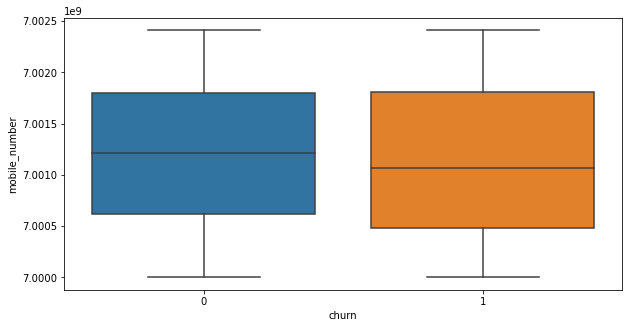

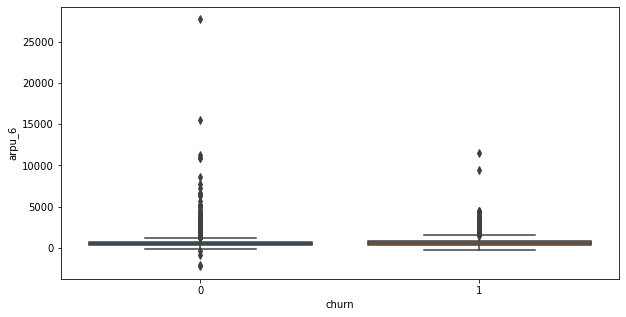

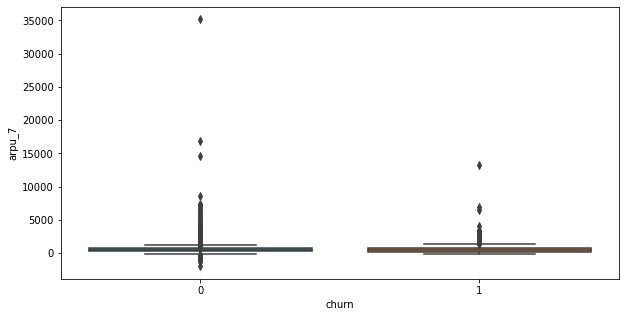

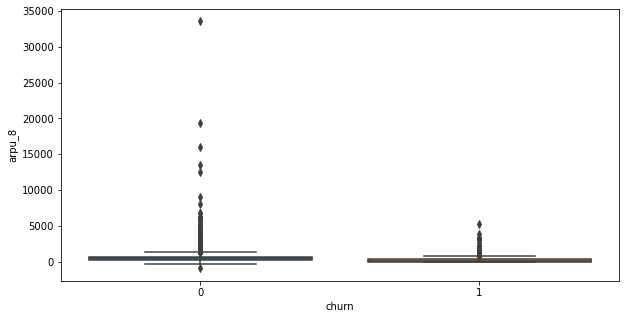

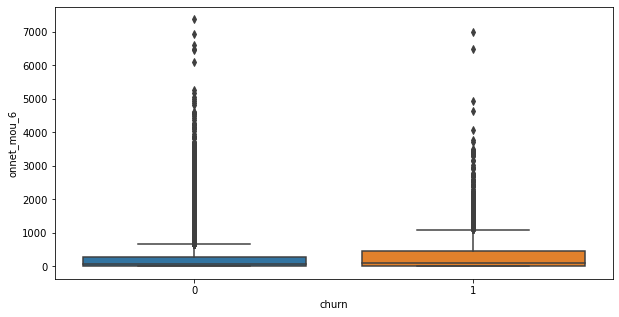

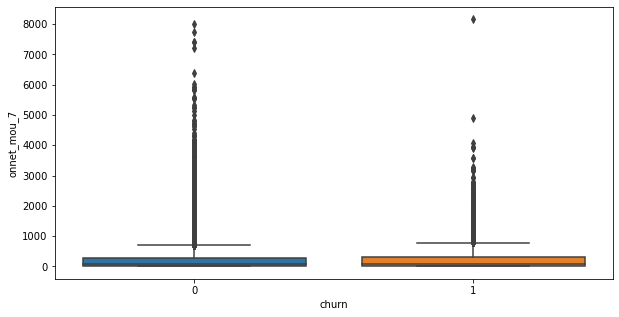

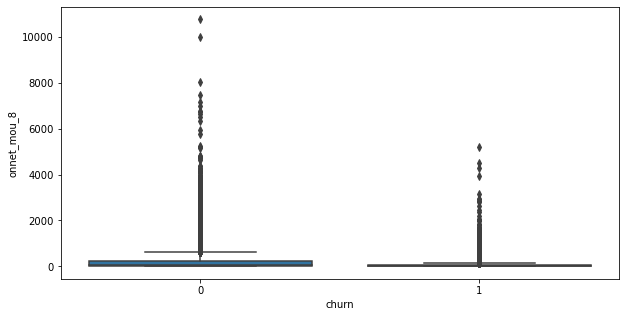

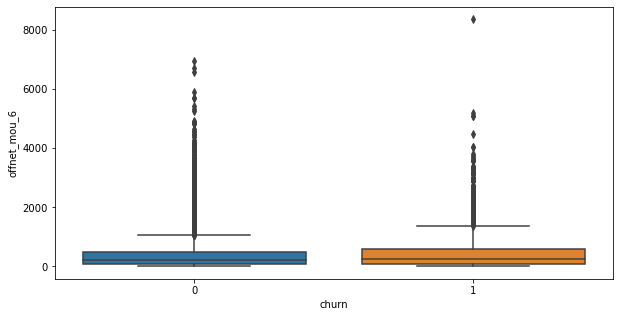

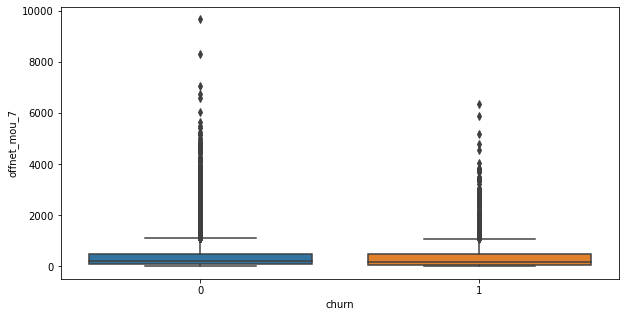

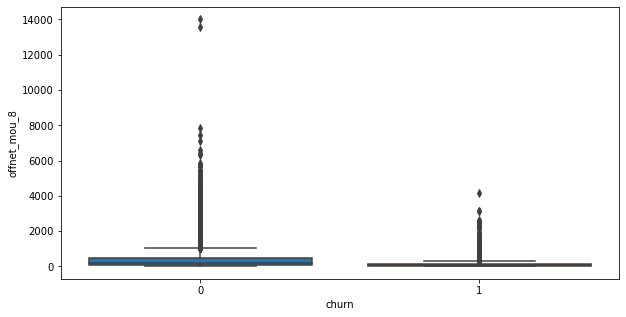

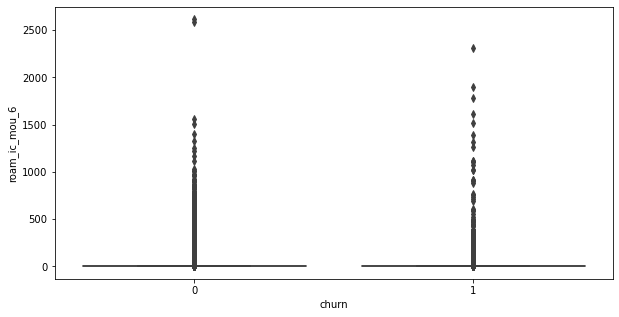

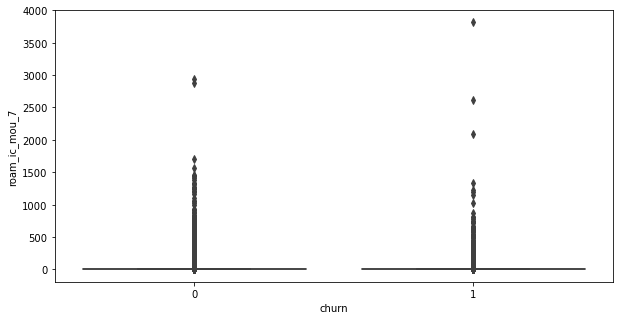

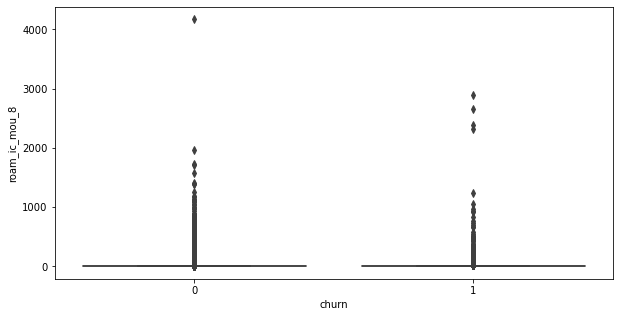

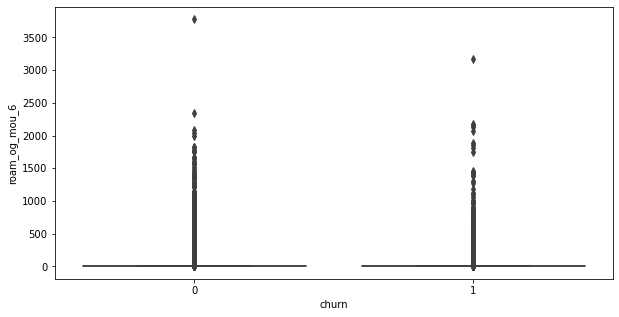

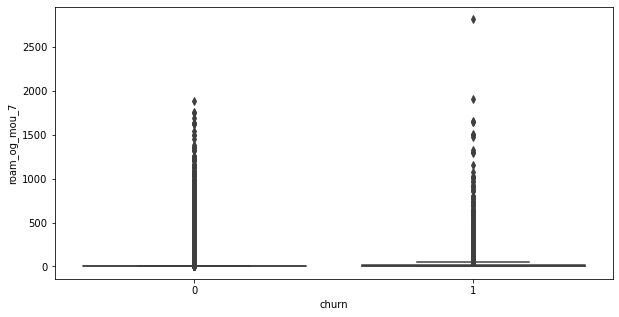

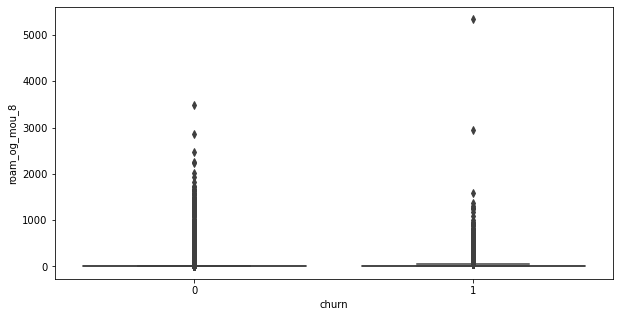

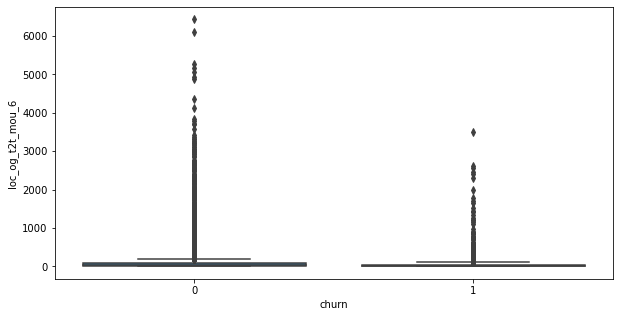

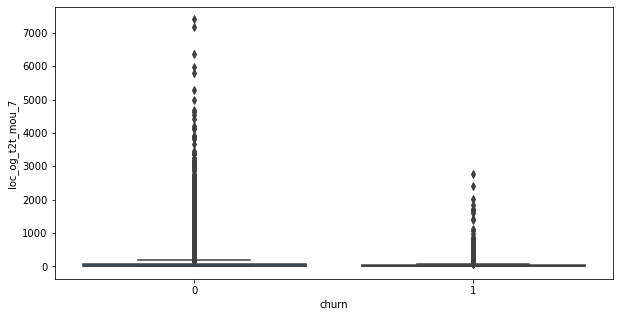

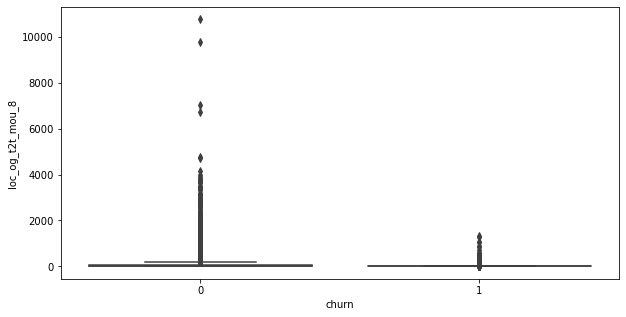

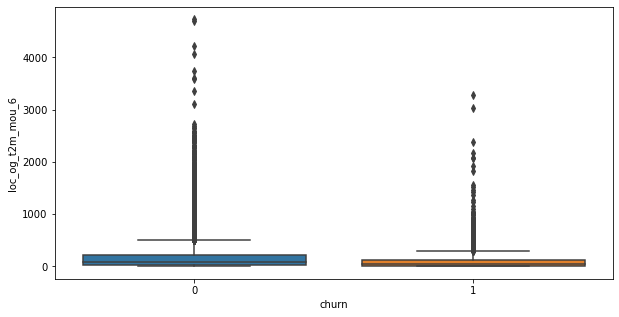

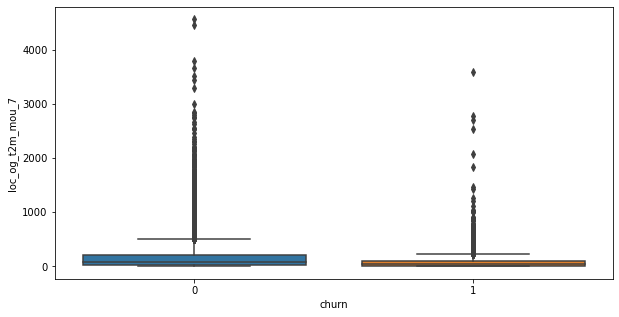

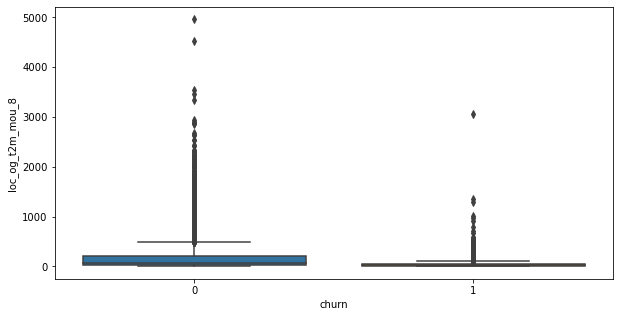

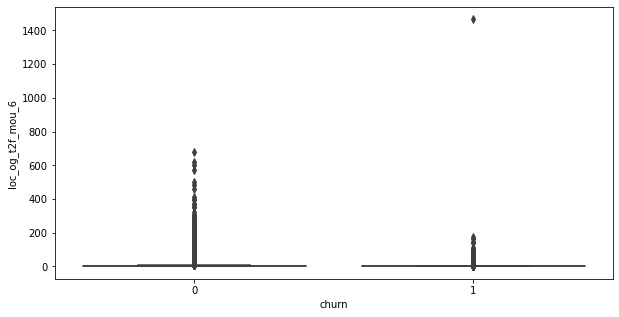

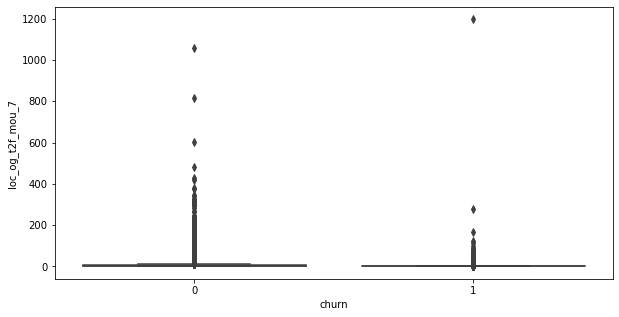

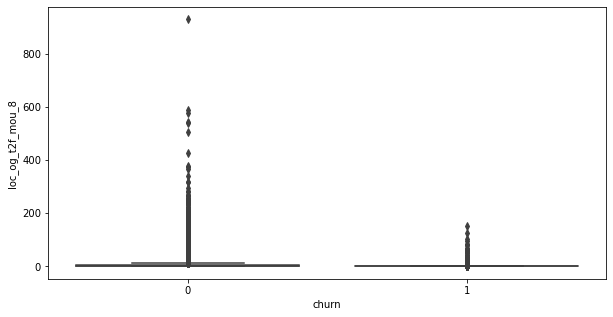

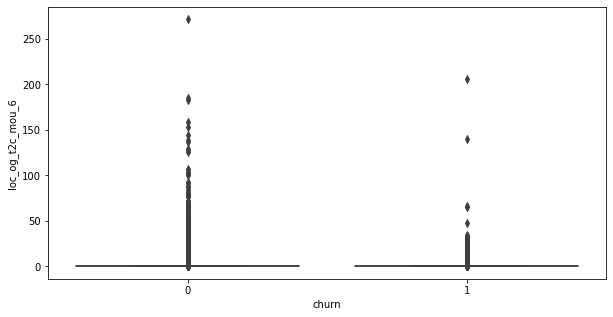

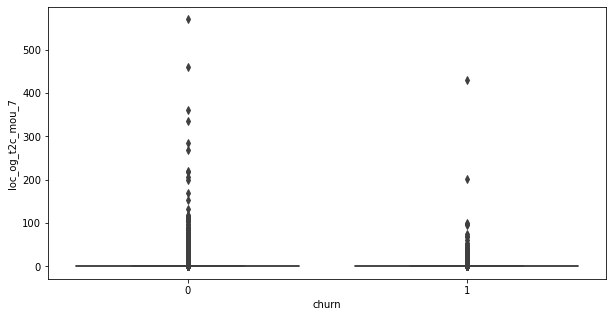

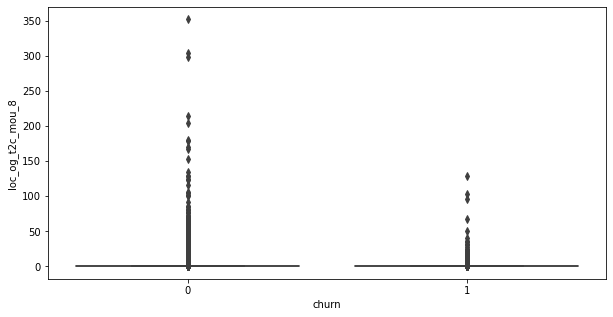

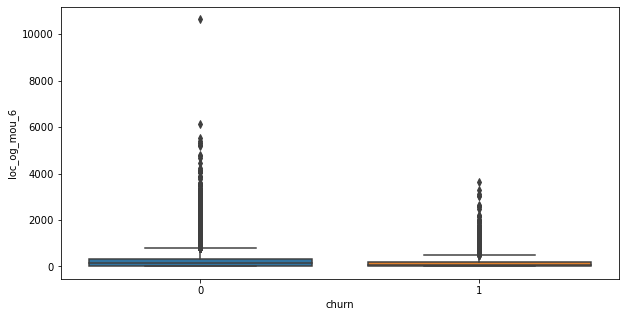

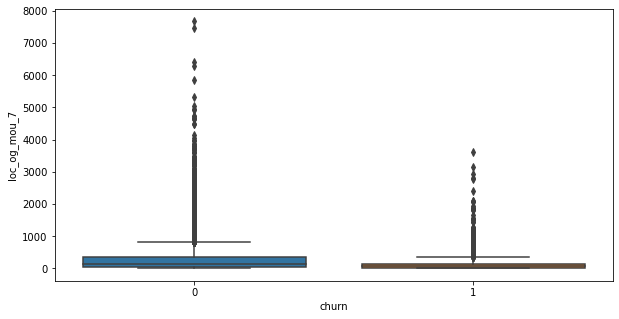

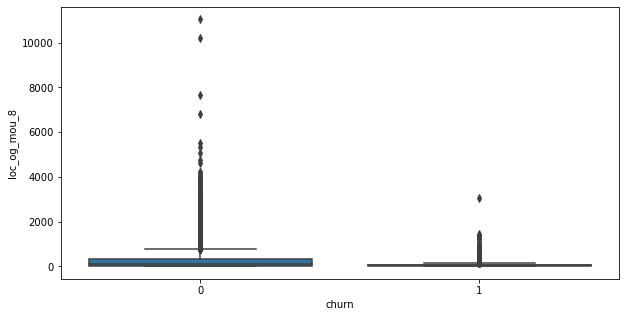

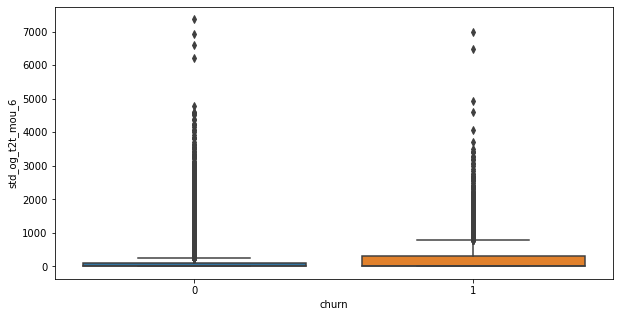

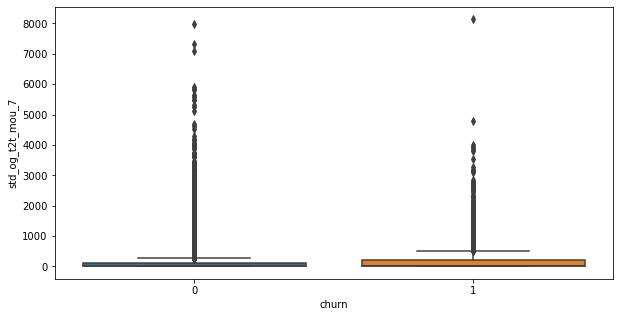

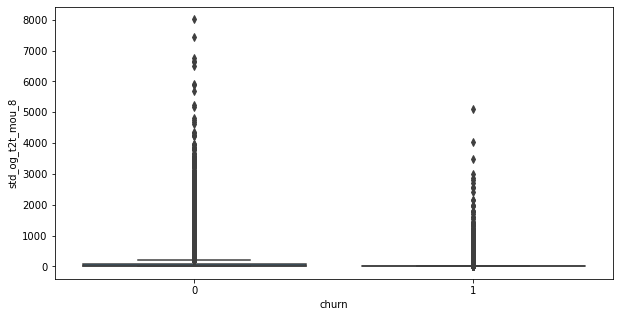

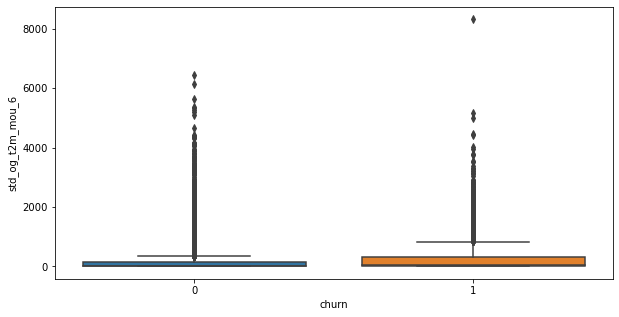

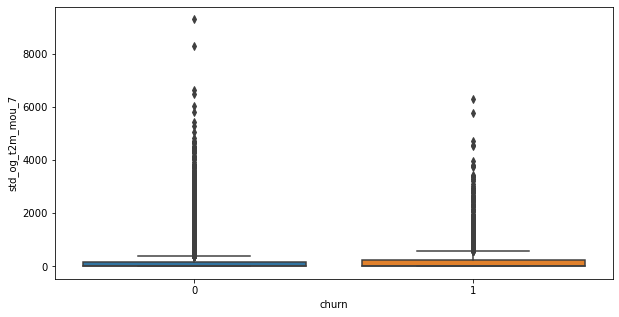

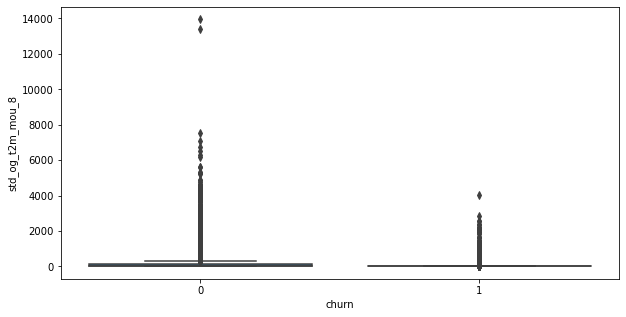

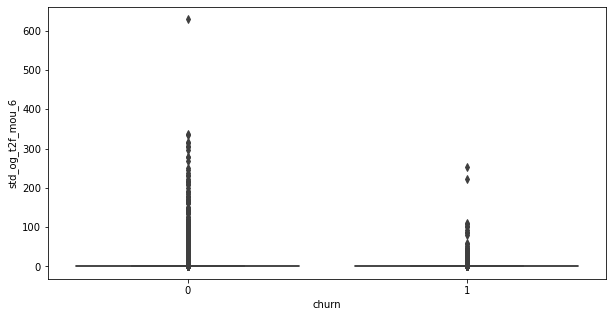

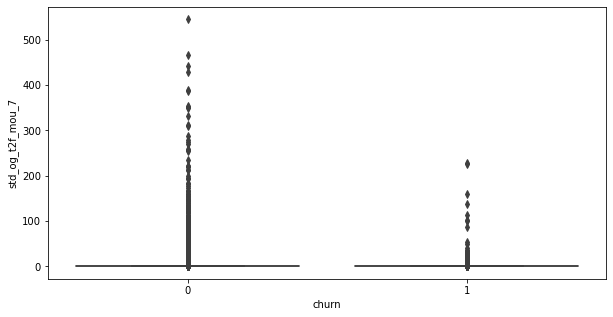

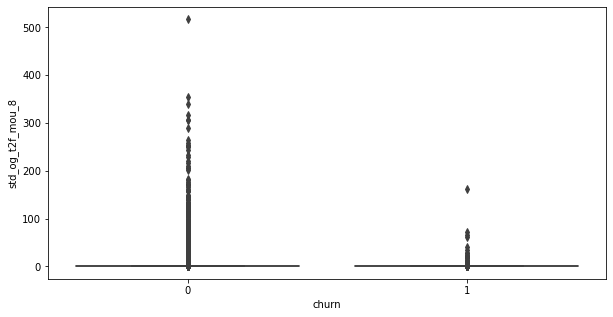

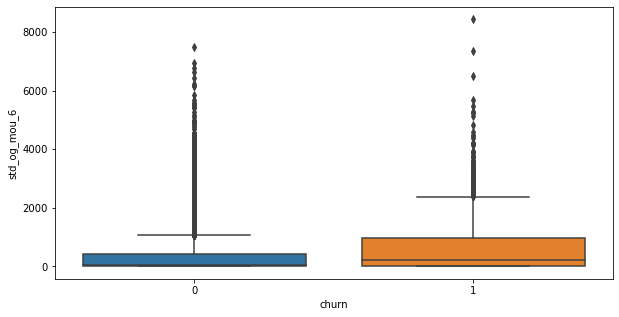

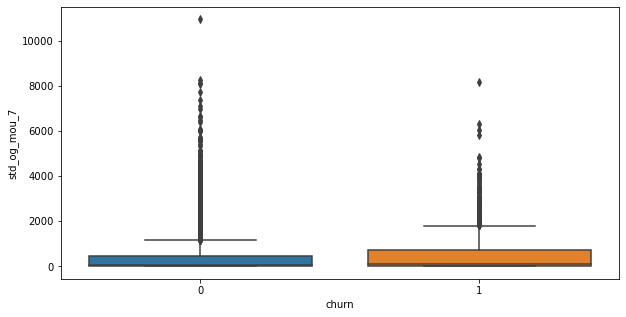

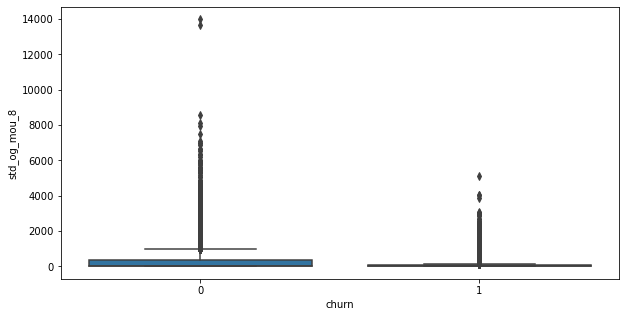

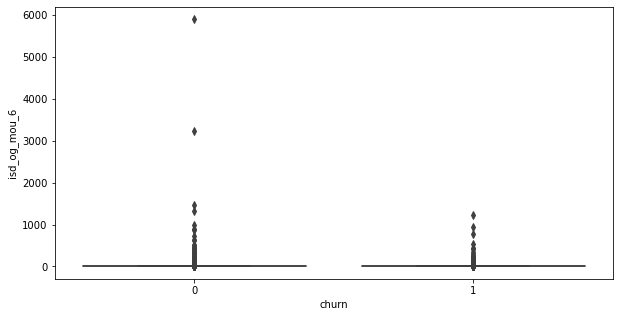

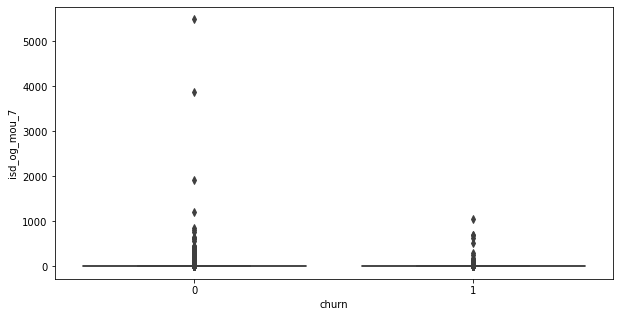

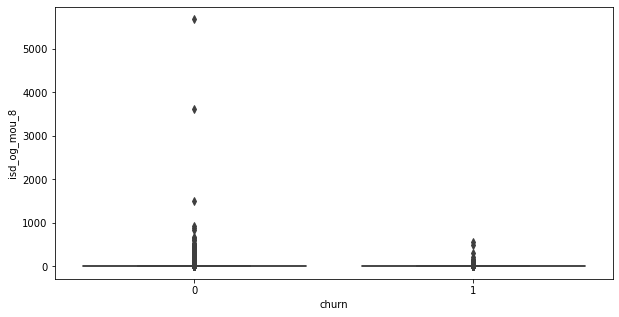

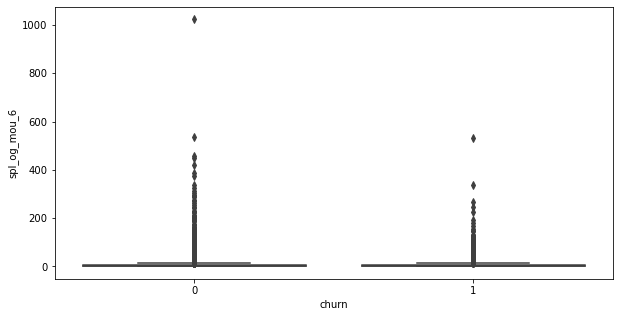

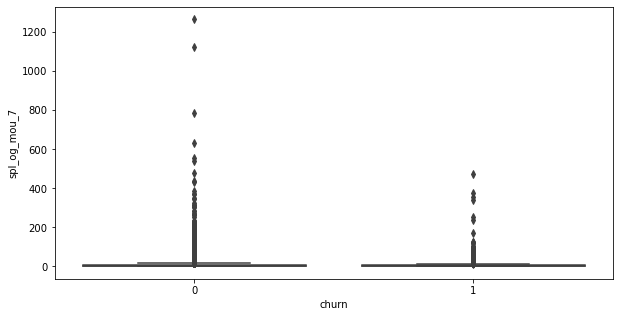

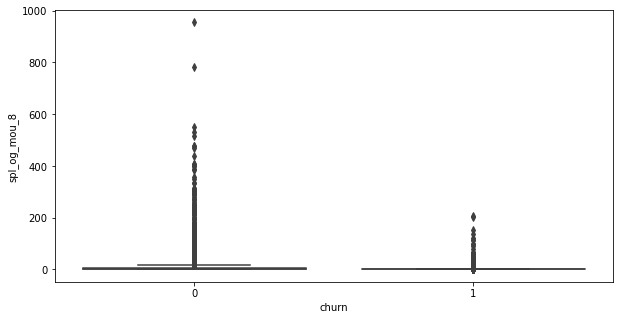

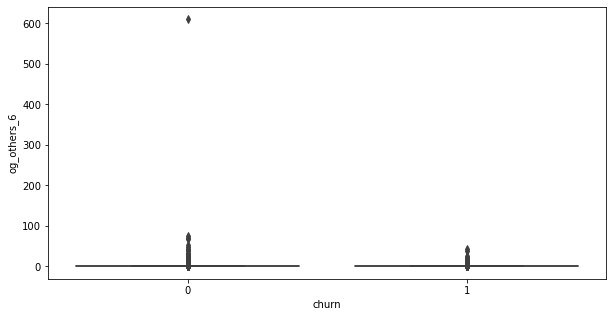

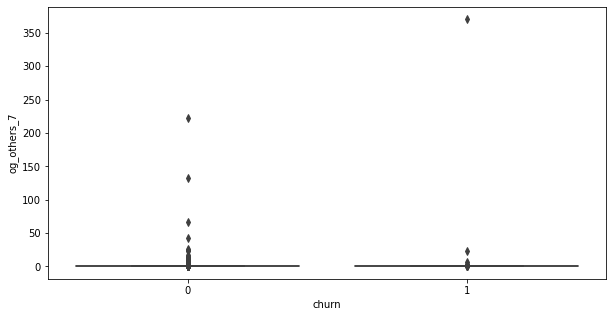

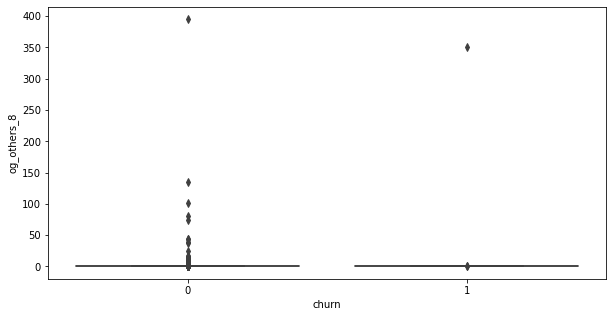

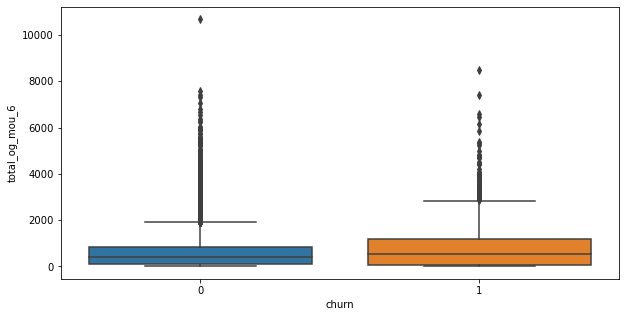

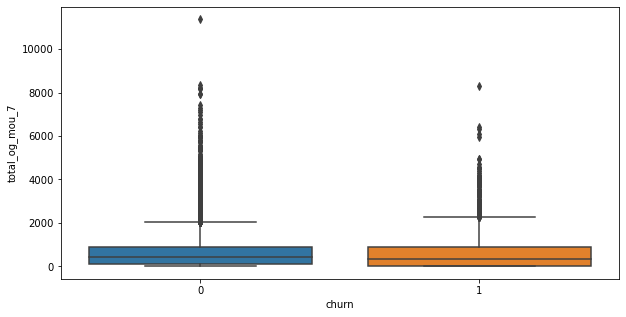

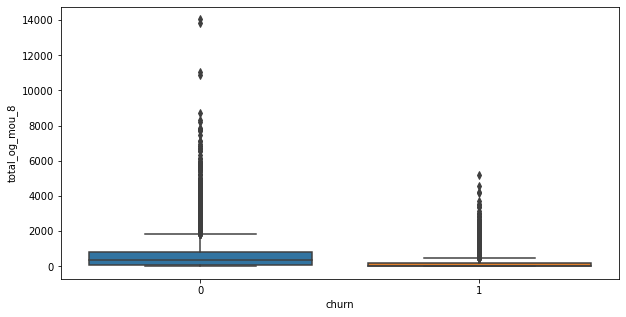

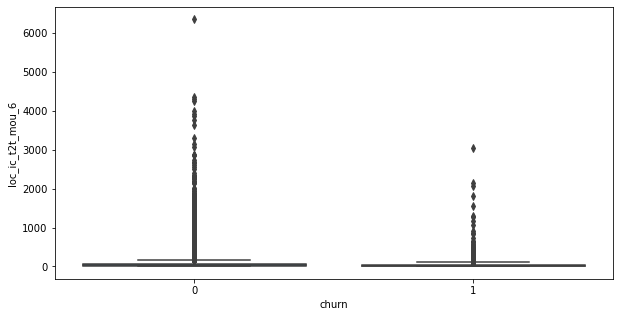

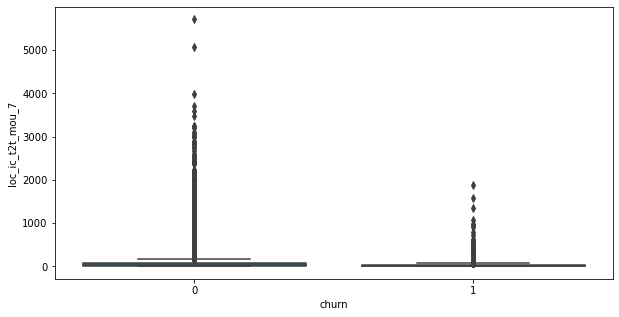

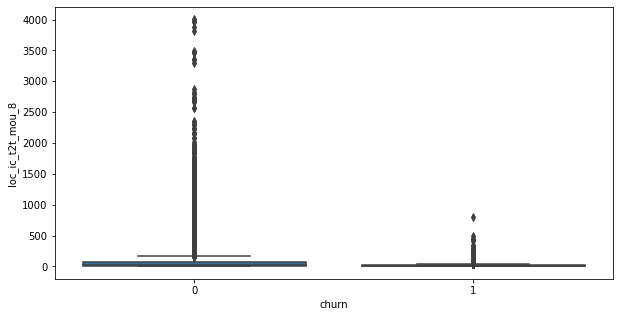

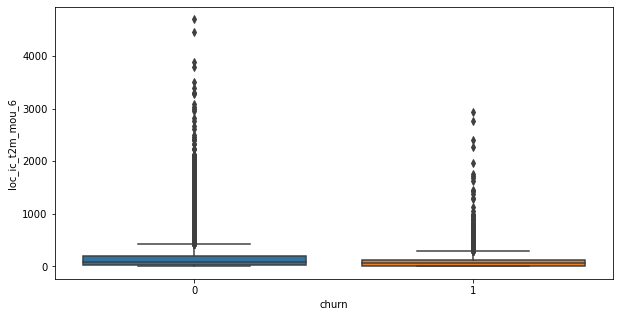

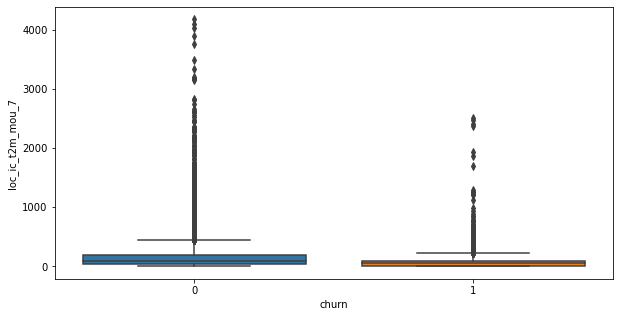

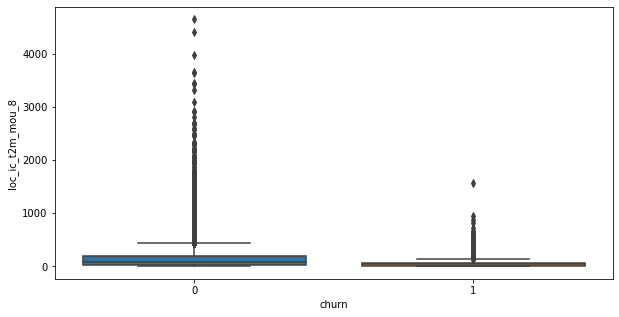

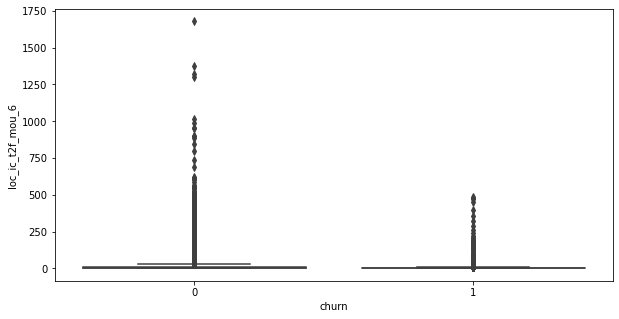

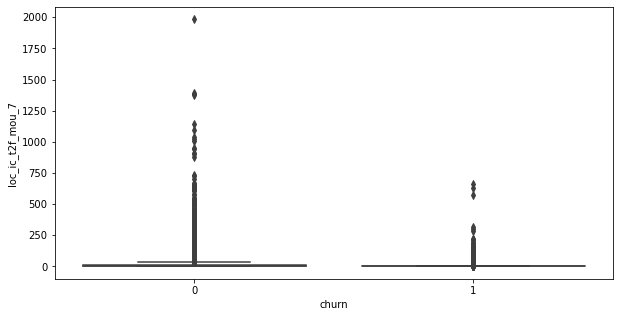

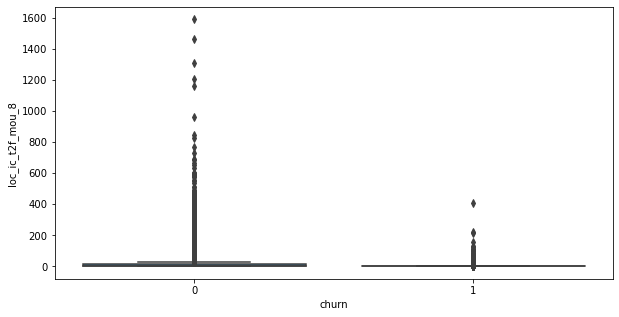

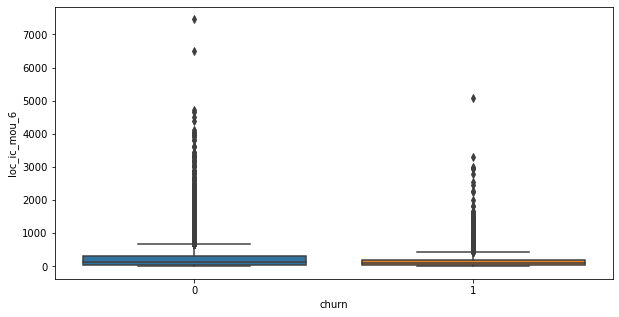

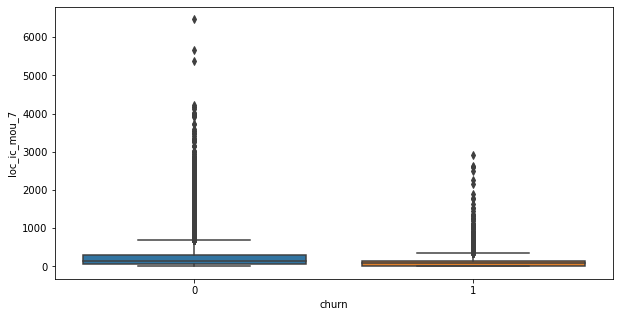

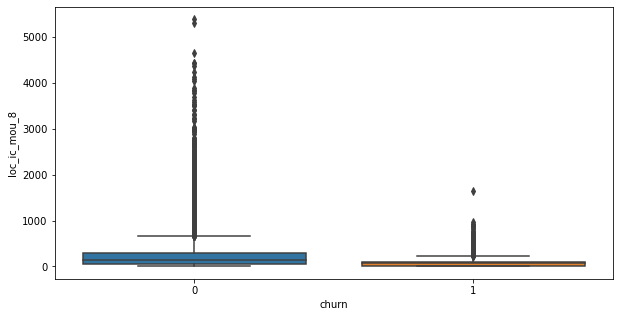

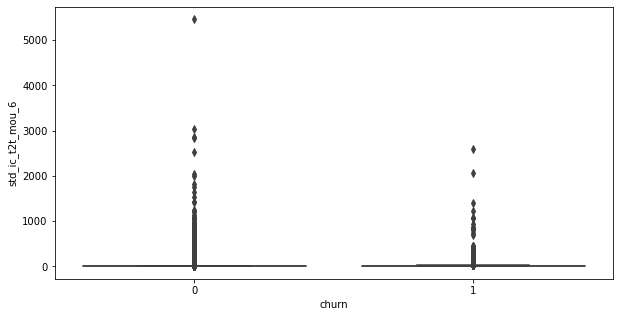

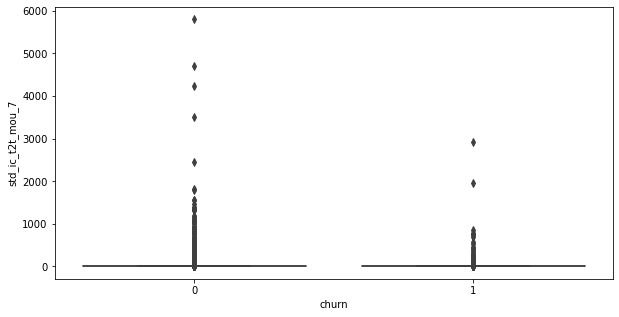

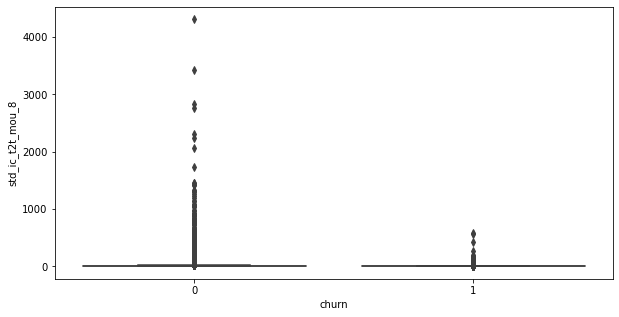

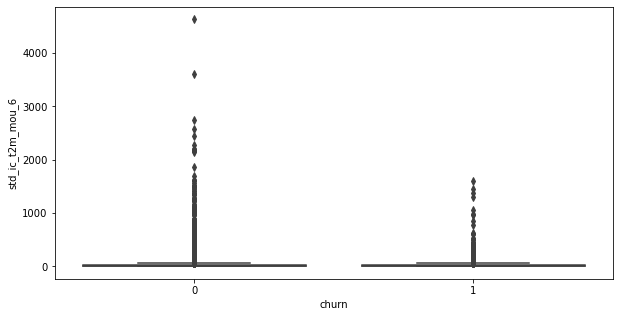

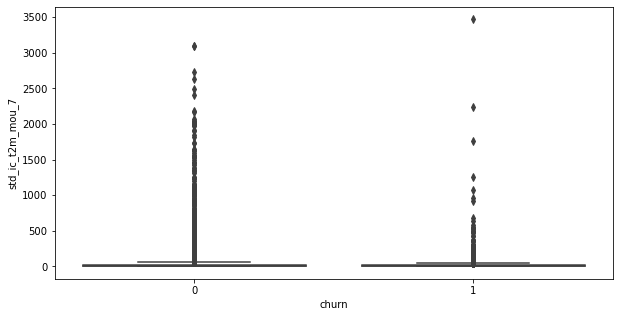

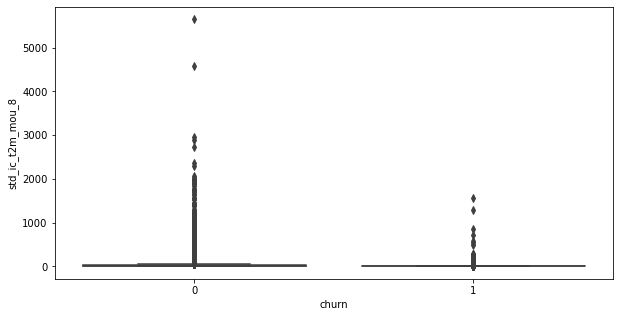

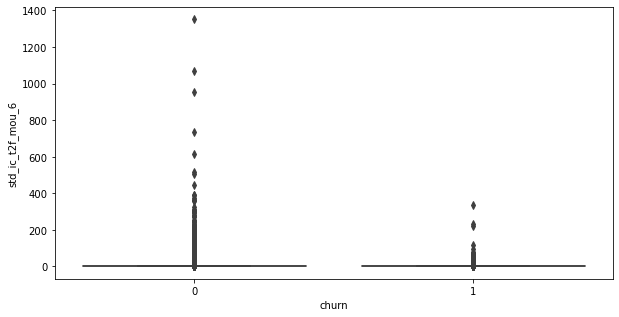

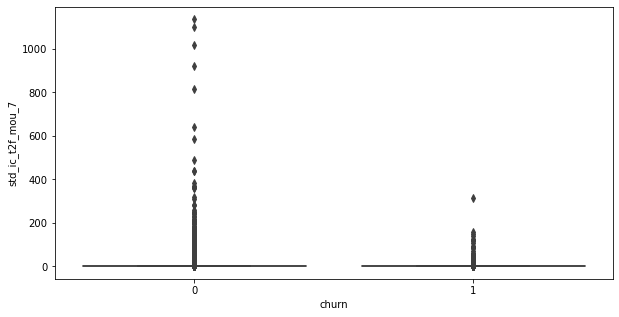

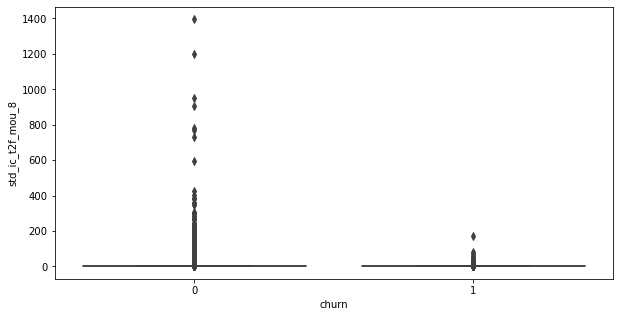

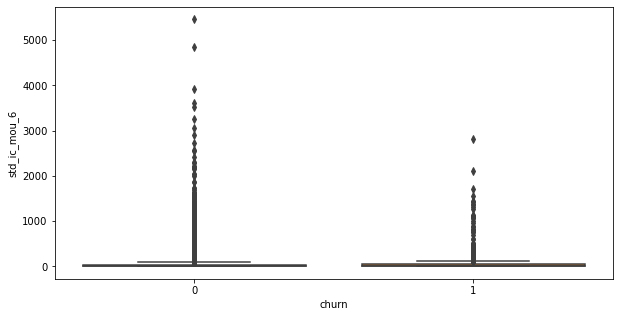

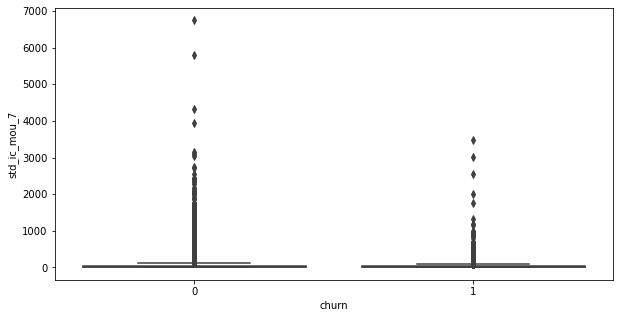

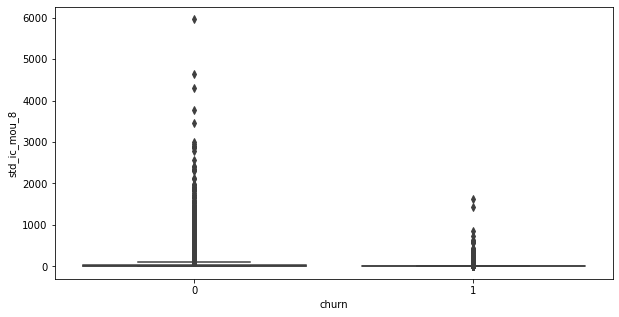

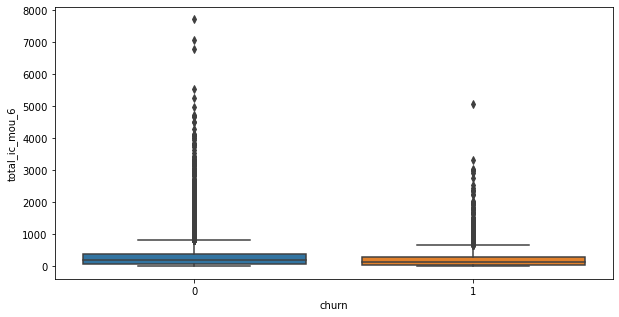

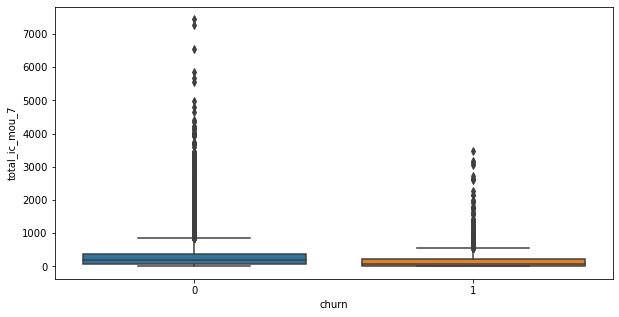

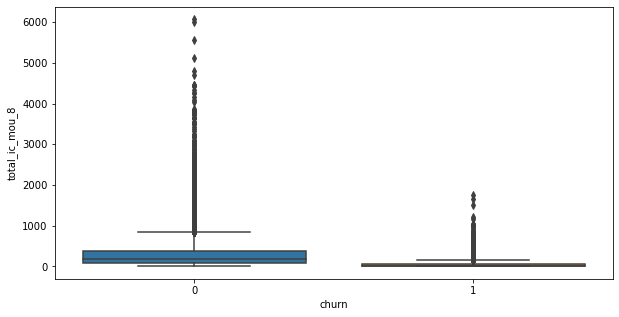

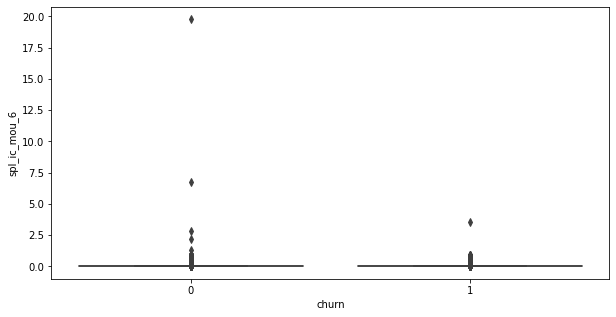

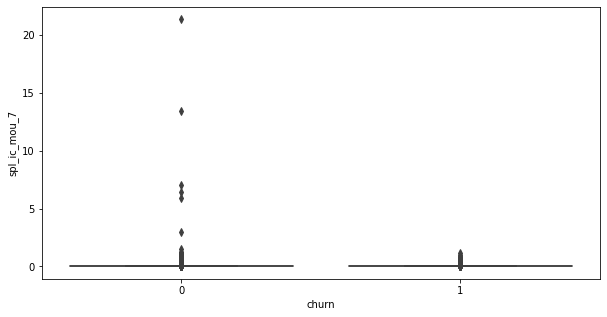

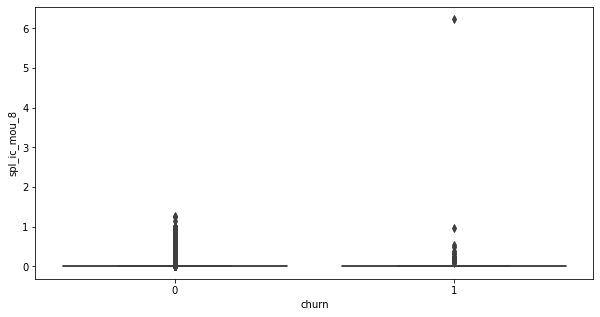

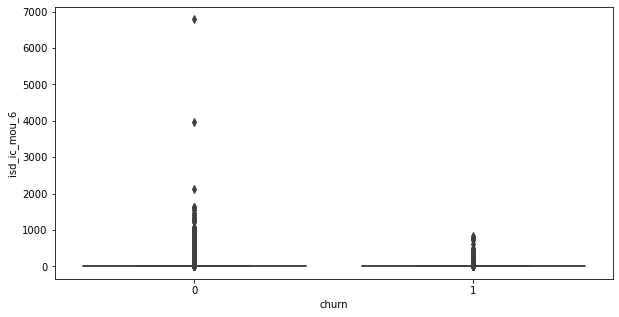

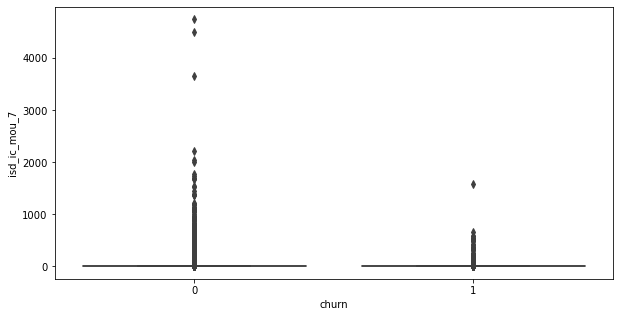

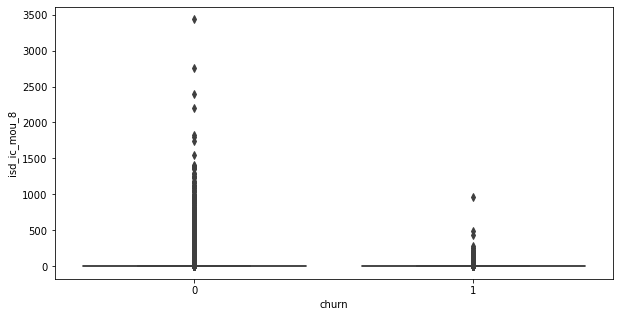

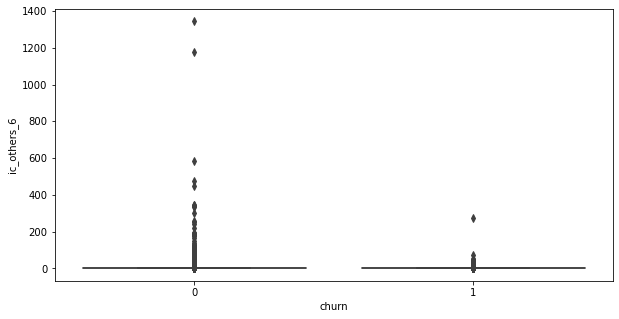

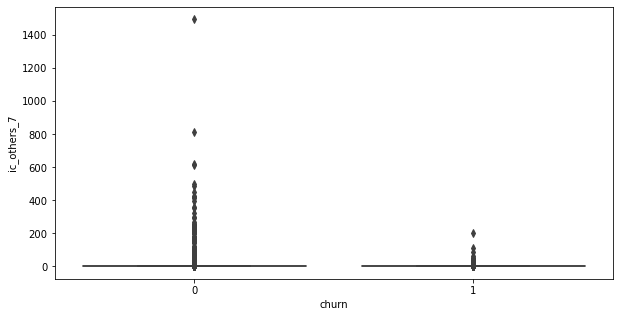

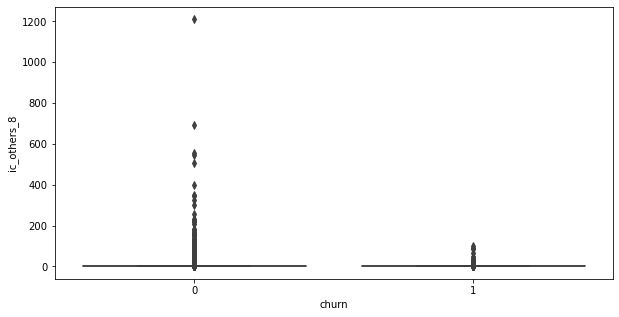

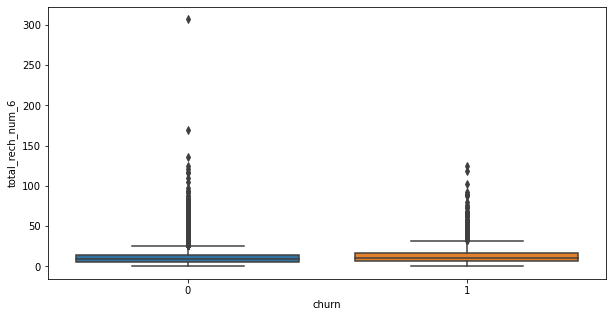

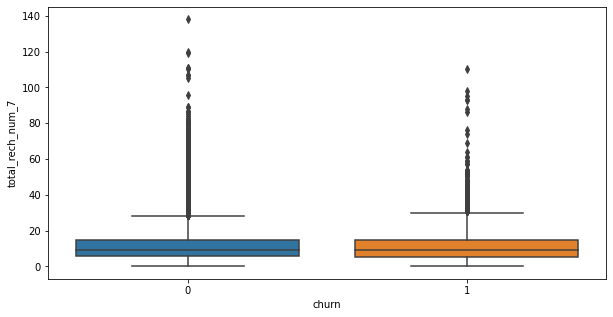

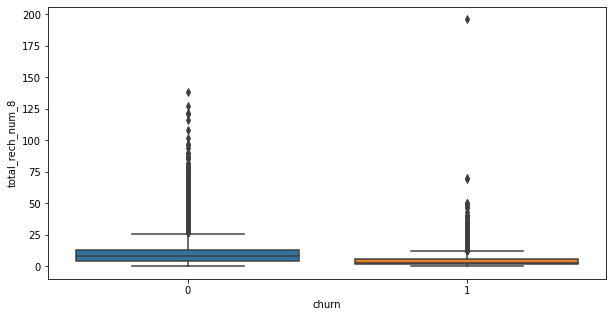

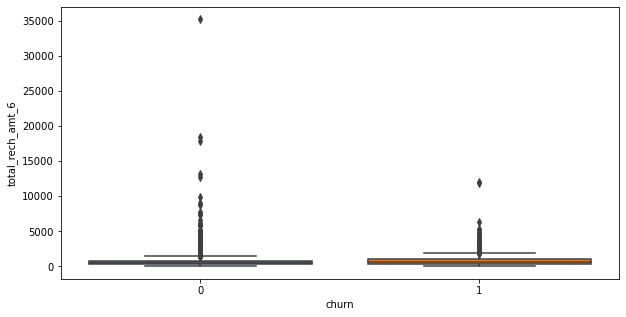

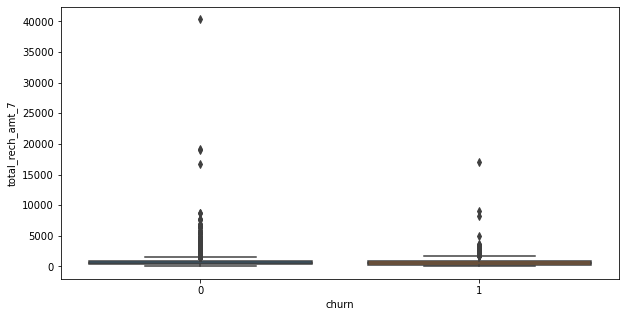

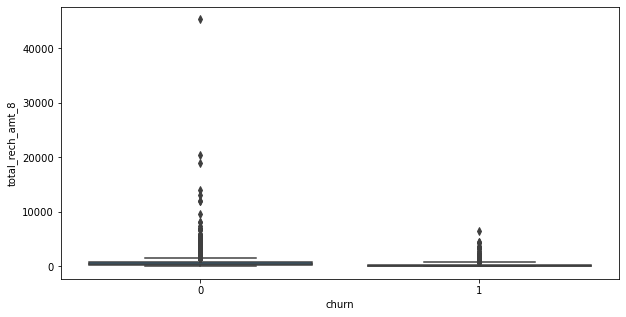

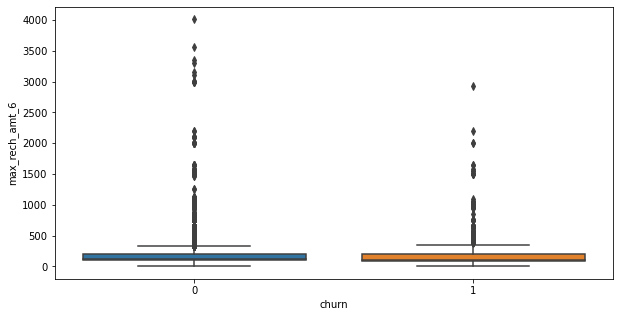

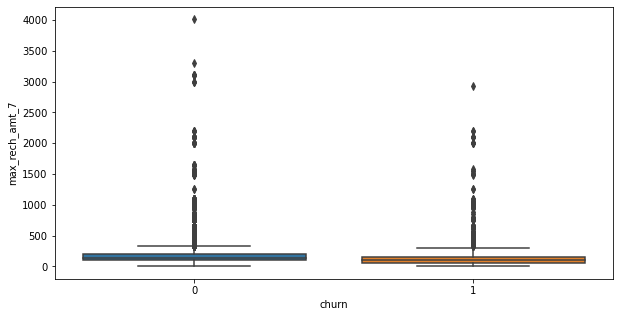

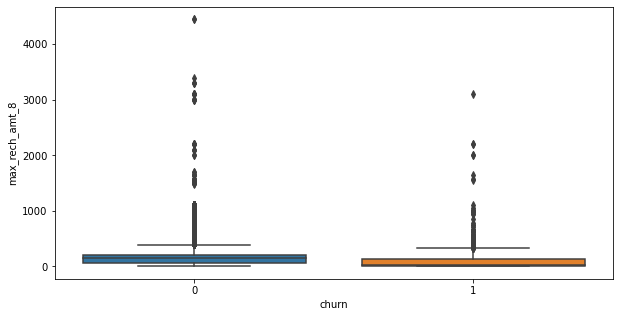

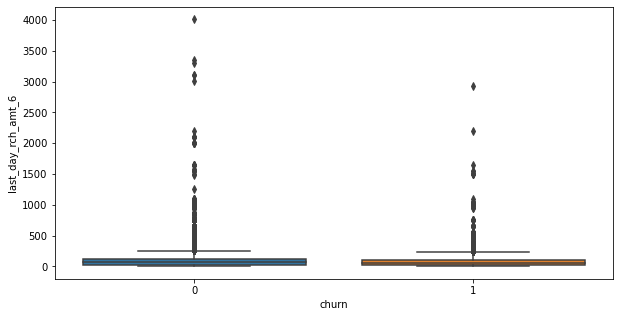

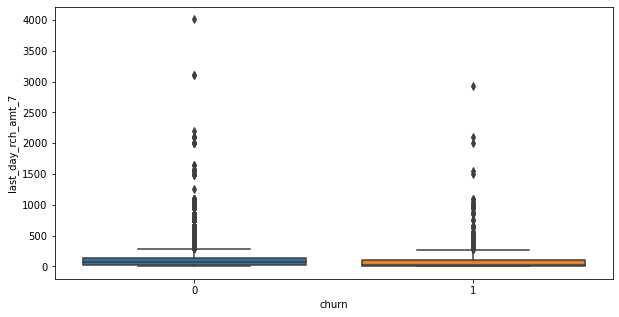

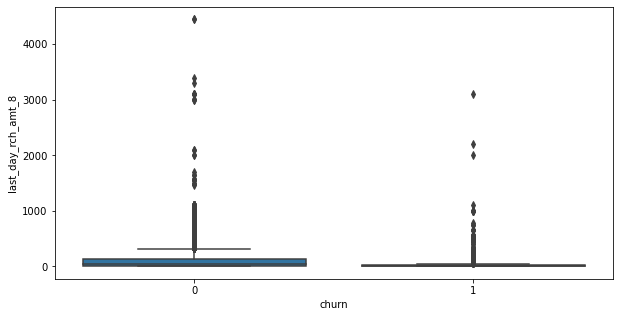

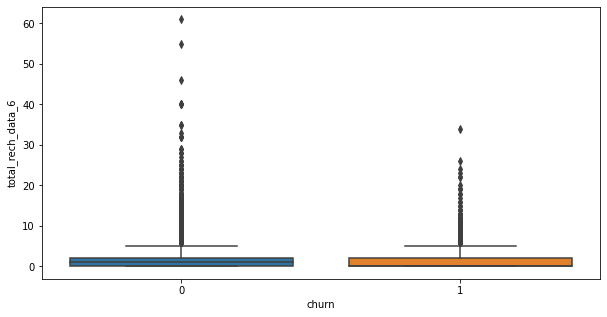

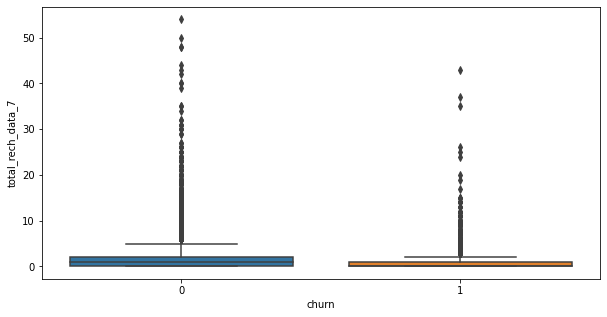

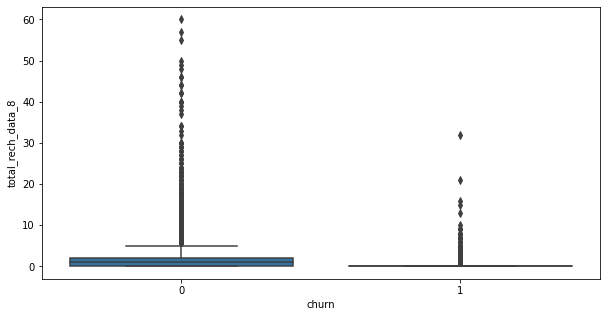

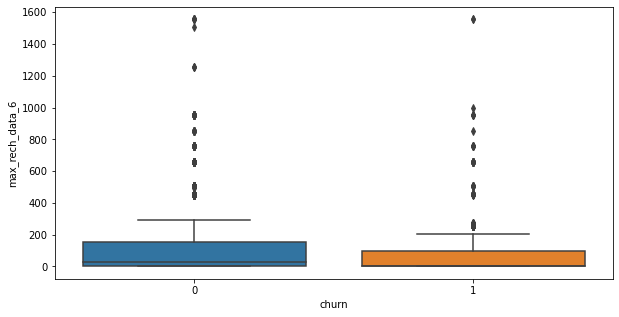

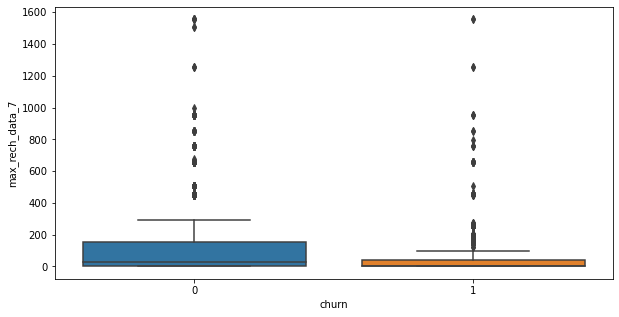

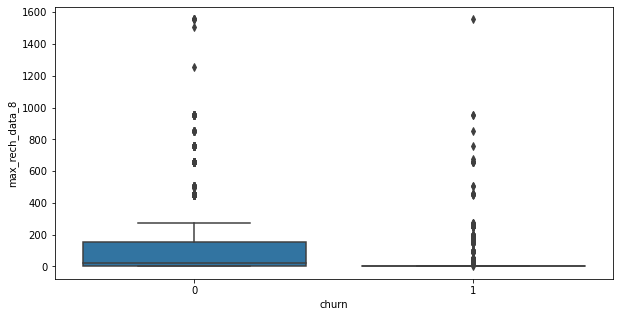

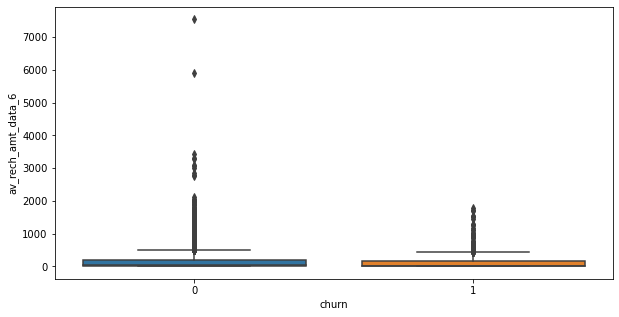

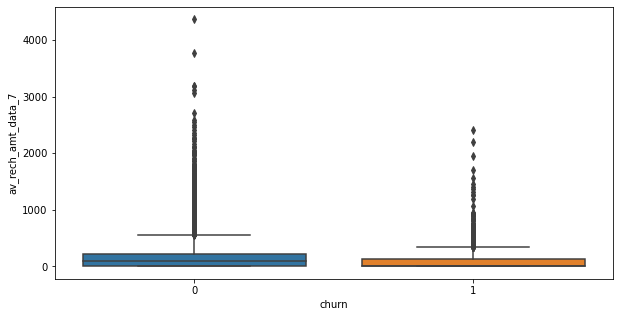

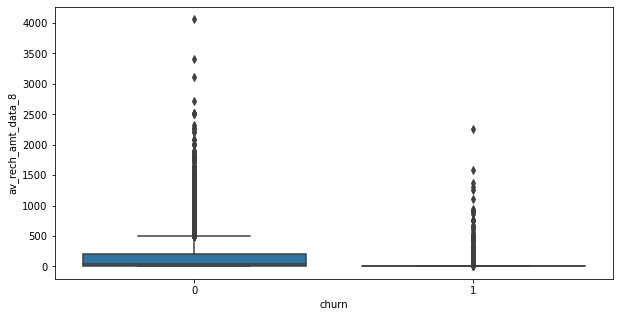

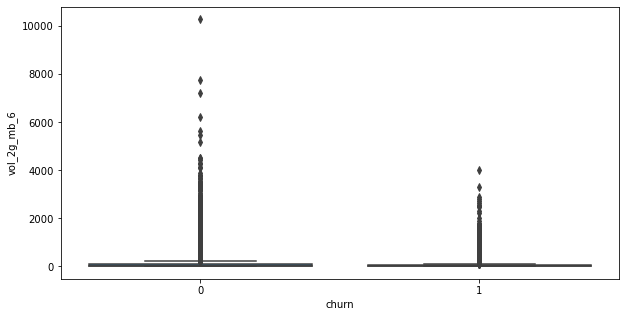

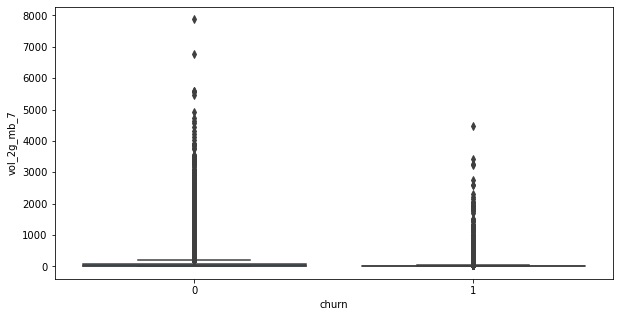

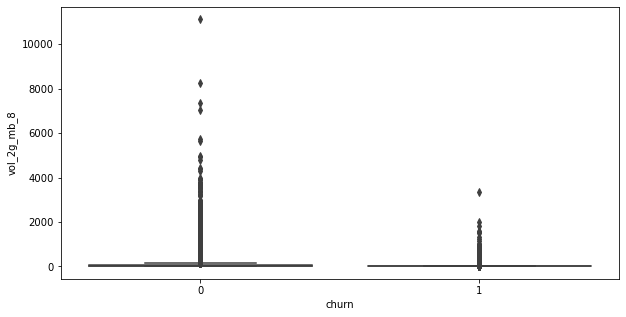

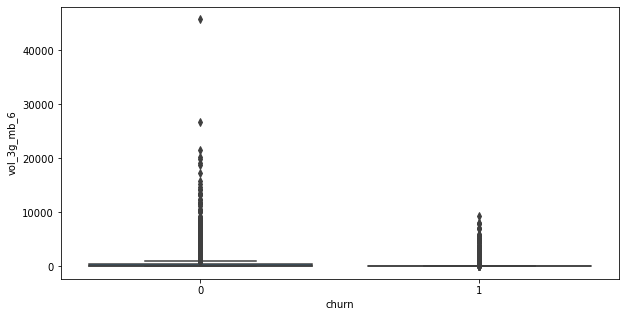

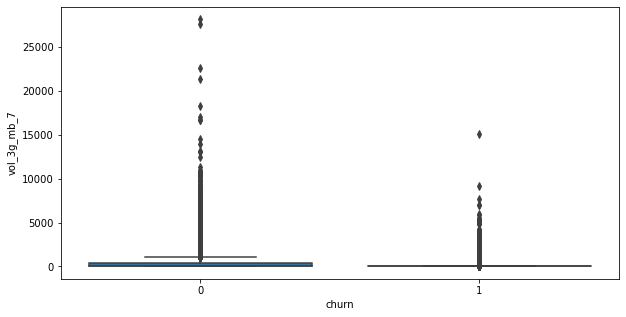

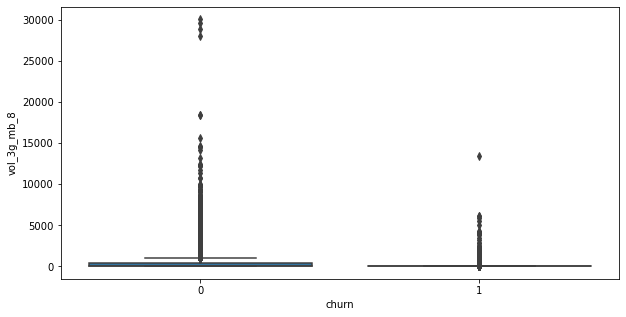

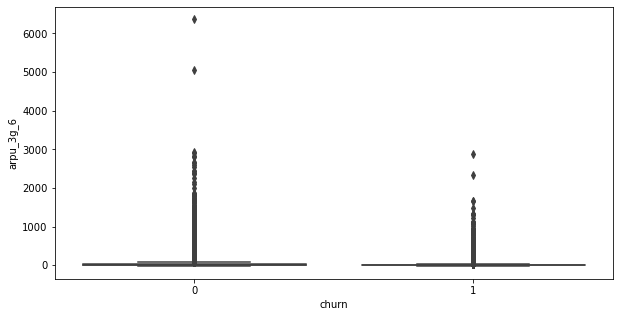

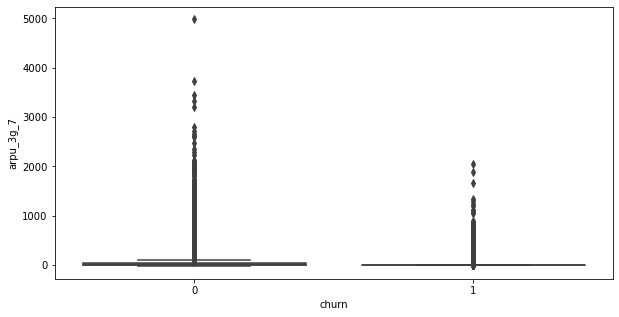

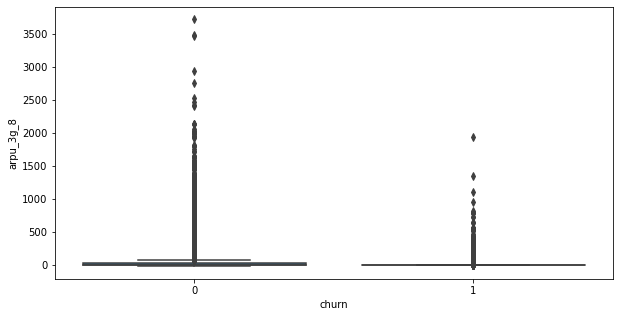

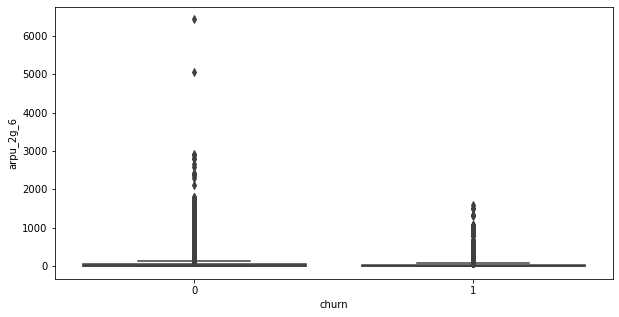

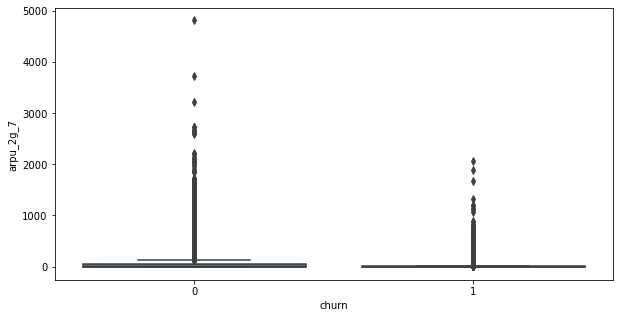

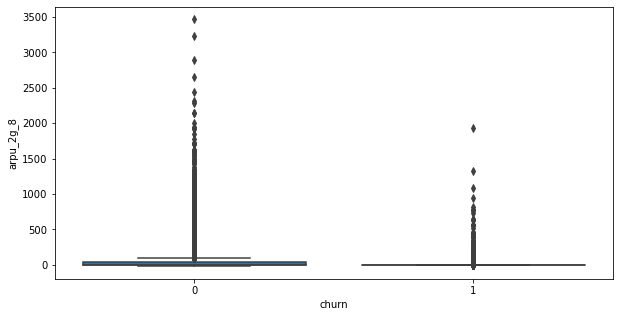

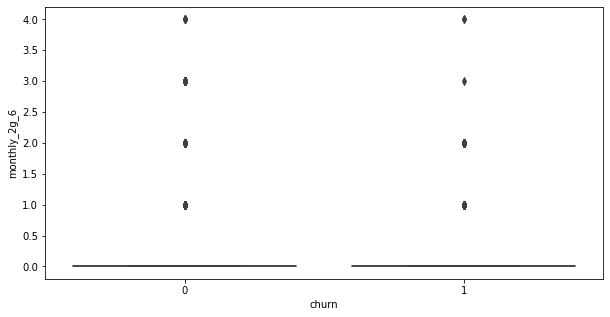

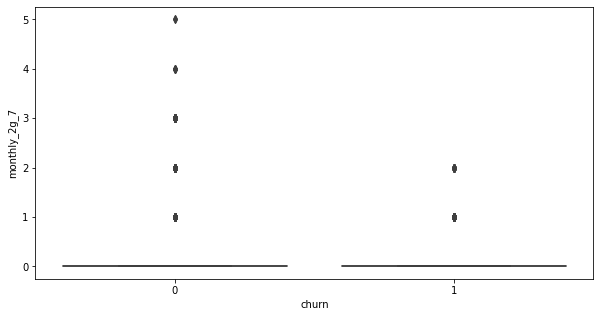

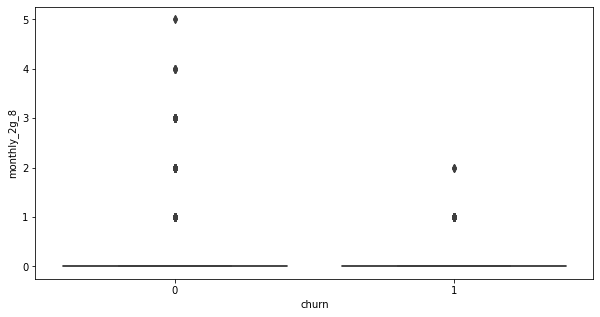

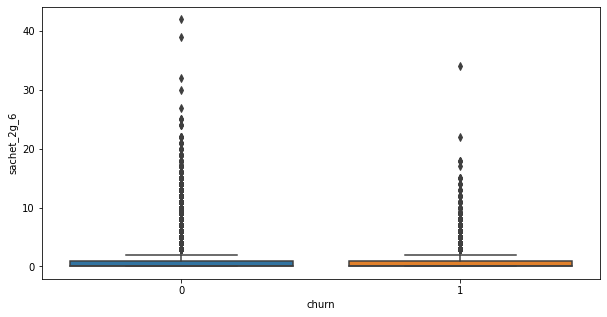

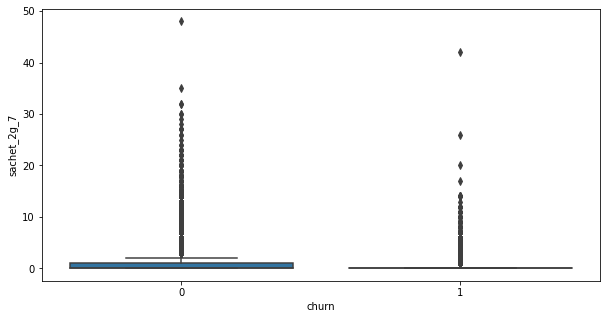

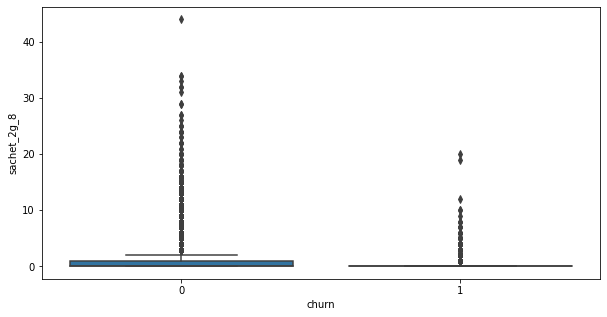

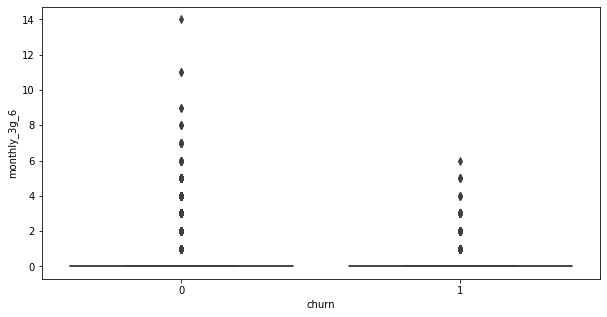

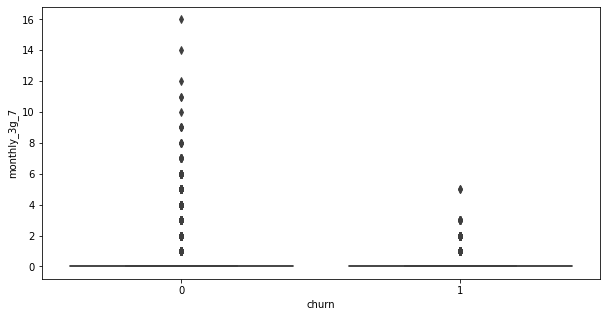

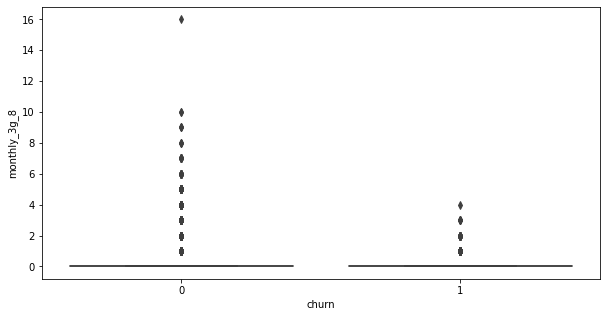

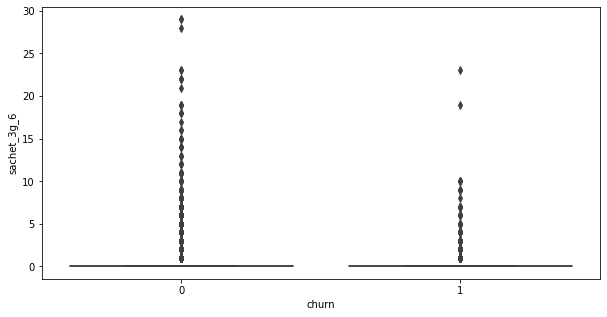

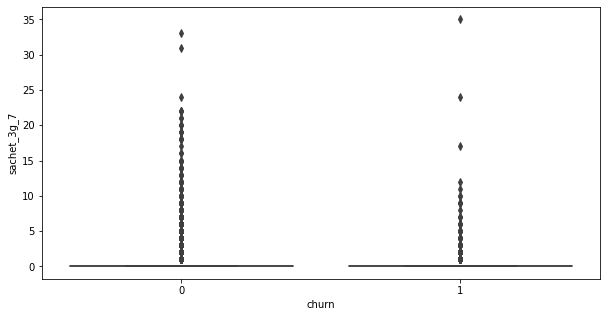

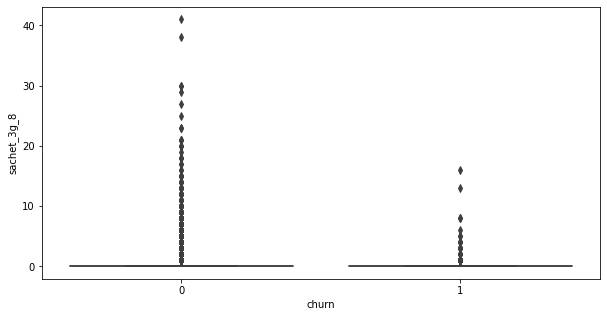

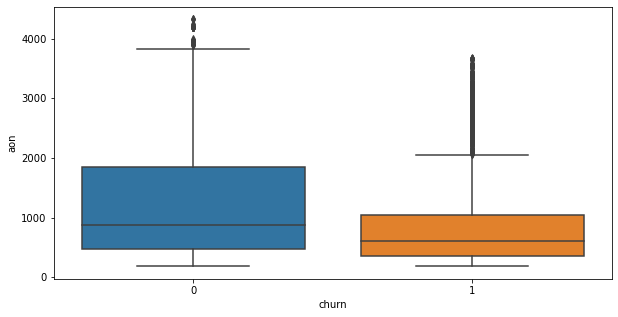

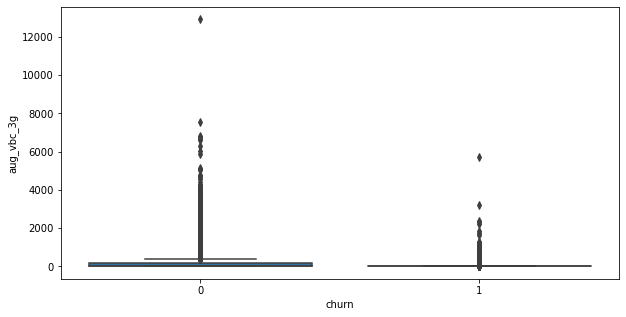

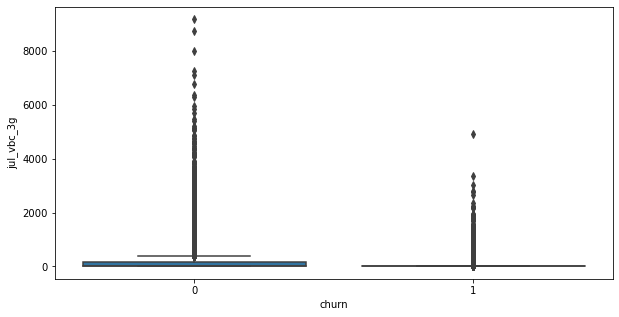

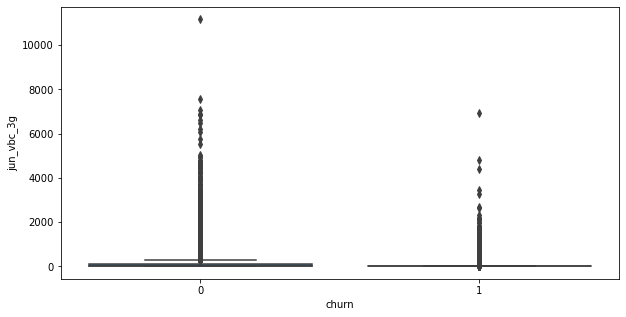

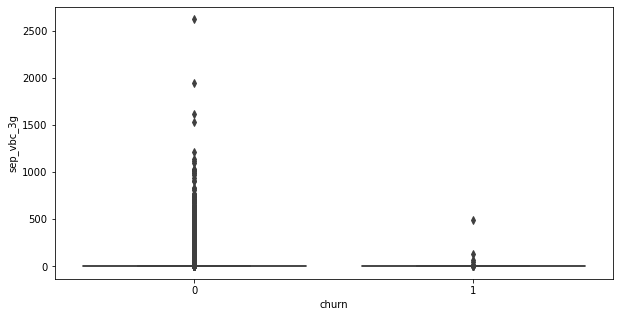

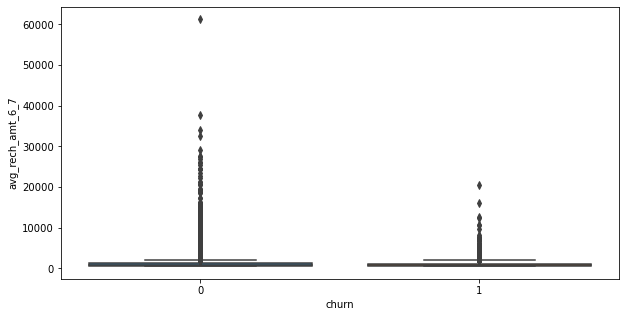

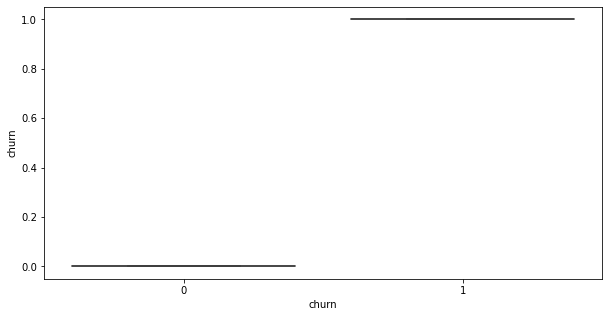

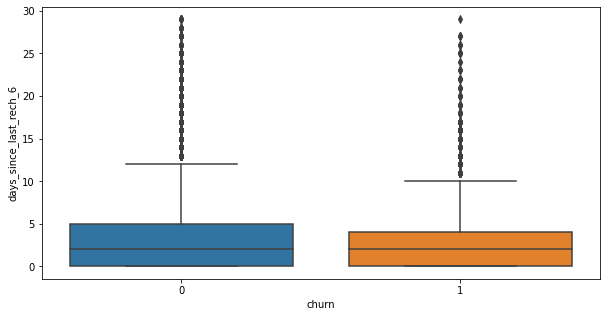

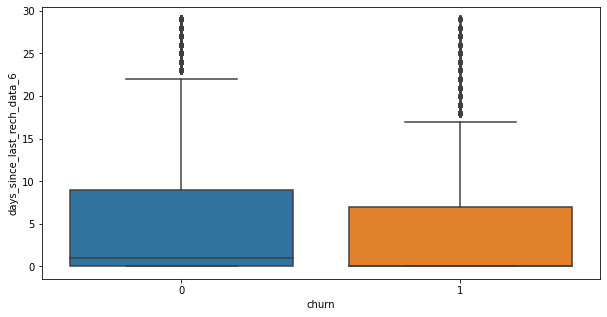

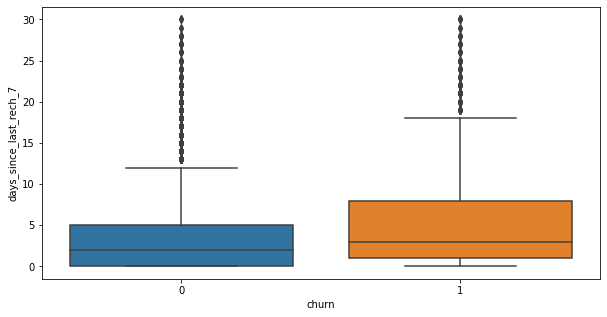

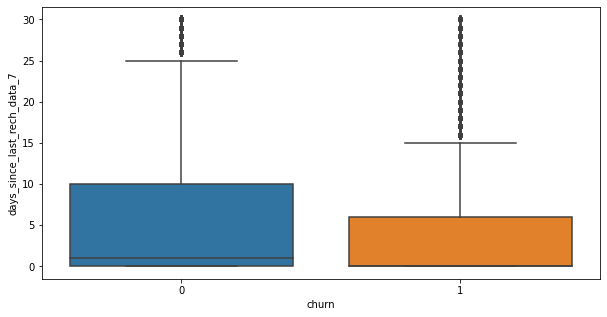

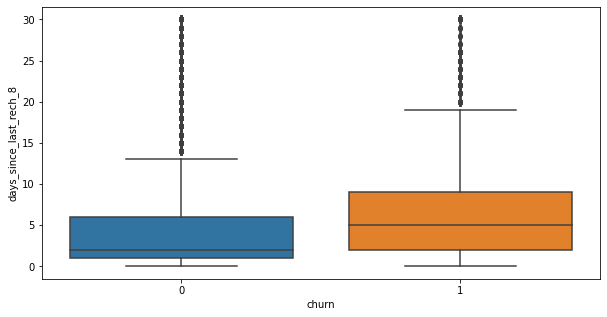

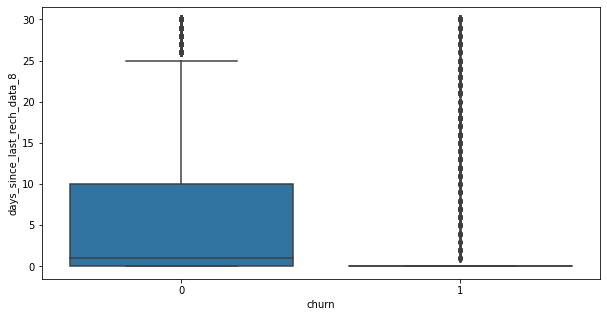

In [142]:
#Plotting box plots for the different attributes to see their impact on churn rate
plt.figure()
for col in telecom_high_value_cust.columns:
    plt.figure(figsize=(10,5))
    sns.boxplot(x= 'churn' , y=col ,data = telecom_high_value_cust)
    plt.xlabel("churn")
    plt.ylabel(col)
    plt.show()

In [143]:
#After visualising the plots above we cannot draw much insights but the below can be observed 

#Deleting mobil number column

del telecom_high_value_cust['mobile_number']



In [144]:
#Removing the mobile number column from intcol list
intcol.remove('mobile_number')

*fb_user and aon columns seem to have impact on reducing the churn rate*

*Now we can see we have all variables as integer or float before proceeding with PCA or model building.*

**Checking the churn rate**

In [146]:
churn = (sum(telecom_high_value_cust['churn'])/len(telecom_high_value_cust['churn'].index))*100
churn


8.136395453484884

*The churn rate is very less and hence the dataset is highly imbalanced which needs to be handled*

## Step 4. Model Building
Let's start by splitting our data into a training set and a test set.

### Splitting Data into Training and Test Sets

In [147]:
#importing train test split library
from sklearn.model_selection import train_test_split

In [148]:
#Splitting the data into training and test set
df_train,df_test = train_test_split(telecom_high_value_cust,train_size=0.7,test_size=0.3,random_state=100)

In [149]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21000 entries, 11785 to 5640
Columns: 148 entries, arpu_6 to days_since_last_rech_data_8
dtypes: float64(122), int64(26)
memory usage: 23.9 MB


### Scaling the features

In [150]:
#importing min max scaler libraries
from sklearn.preprocessing import MinMaxScaler

In [151]:
scaler= MinMaxScaler()

In [152]:
#Scaling the data
df_train[df_train.columns] = scaler.fit_transform(df_train[df_train.columns])
df_train.head()

<ipython-input-152-2f6437b36731>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[df_train.columns] = scaler.fit_transform(df_train[df_train.columns])
C:\Users\hp\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,...,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7,churn,days_since_last_rech_6,days_since_last_rech_data_6,days_since_last_rech_7,days_since_last_rech_data_7,days_since_last_rech_8,days_since_last_rech_data_8
11785,0.111540,0.078696,0.027671,0.000771,0.001015,0.000450,0.018164,0.016449,0.007001,0.011185,0.006991,0.010734,0.001939,0.005114,0.001847,0.000838,0.001032,0.000450,0.004573,0.006710,0.003993,0.000812,0.000000,0.000000,0.0,0.011234,0.003127,0.002652,0.005075,0.002234,0.000000,0.000000,0.000000,0.000314,0.001173,0.000951,0.000000,0.000000,0.000000,0.000309,0.000996,0.000948,0.02044,0.017391,0.009506,0.000000,0.006755,0.001403,0.00000,0.0,...,0.051472,0.099252,0.008728,0.044954,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005955,0.001856,0.005363,0.003022,0.002714,0.003575,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.838203,0.000000,0.000000,0.000000,0.0,0.019003,0.0,0.241379,0.000000,0.300000,0.000000,0.066667,0.000000
11987,0.092434,0.062585,0.020929,0.019642,0.006110,0.003786,0.038403,0.023547,0.018948,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010023,0.004269,0.003786,0.058659,0.039398,0.042642,0.008281,0.004330,0.058713,0.0,0.028980,0.000000,0.033266,0.028773,0.025981,0.010918,0.002368,0.000000,0.003793,0.002110,0.001383,0.000000,0.012449,0.000000,0.013279,0.004173,0.001380,0.00000,0.000000,0.000000,0.000000,0.013043,0.000000,0.00000,0.0,...,0.029220,0.027431,0.024439,0.029220,0.032787,0.055556,0.016667,0.063023,0.063023,0.063023,0.033108,0.033906,0.024132,0.001301,0.021199,0.030489,0.007547,0.005118,0.005702,0.008947,0.004260,0.005363,0.003121,0.002839,0.003578,0.00,0.0,0.0,0.047619,0.062500,0.022727,0.0,0.0,0.0,0.0,0.0,0.0,0.523304,0.014253,0.016099,0.024627,0.0,0.011385,0.0,0.206897,0.206897,0.100000,0.100000,0.000000,0.466667
11648,0.085263,0.062654,0.019432,0.009398,0.009450,0.007745,0.039855,0.030865,0.015231,0.006848,0.011088,0.023603,0.007271,0.007585,0.014369,0.003349,0.001621,0.002468,0.044434,0.047956,0.025664,0.002135,0.005834,0.000000,0.0,0.000000,0.000000,0.022064,0.031690,0.013939,0.005910,0.007523,0.003389,0.012172,0.006009,0.002787,0.000000,0.000000,0.000000,0.017166,0.010697,0.004724,0.00000,0.000029,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,...,0.029220,0.007481,0.007481,0.006743,0.016393,0.074074,0.000000,0.014791,0.014791,0.000000,0.003885,0.021077,0.000000,0.000012,0.000021,0.000000,0.000000,0.000000,0.000000,0.005955,0.001856,0.005363,0.003034,0.002727,0.003575,0.00,0.0,0.0,0.023810,0.083333,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.750785,0.000000,0.000000,0.000000,0.0,0.002240,0.0,0.000000,0.172414,0.066667,0.200000,0.266667,0.000000
12890,0.1

In [153]:
#Transforming the test data
#using intcol for getting all the numerical columns
df_test[df_test.columns] = scaler.transform(df_test[df_test.columns])
df_test.head()

<ipython-input-153-b6149fb70212>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[df_test.columns] = scaler.transform(df_test[df_test.columns])
C:\Users\hp\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,...,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7,churn,days_since_last_rech_6,days_since_last_rech_data_6,days_since_last_rech_7,days_since_last_rech_data_7,days_since_last_rech_8,days_since_last_rech_data_8
6102,0.093297,0.068666,0.018477,0.002157,0.000675,0.000743,0.006486,0.001537,0.001596,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000546,0.000448,0.000743,0.009510,0.000968,0.002820,0.002442,0.001262,0.002873,0.000111,0.000000,0.000000,0.004893,0.001221,0.002146,0.001682,0.000283,0.000000,0.000560,0.000962,0.000411,0.002899,0.000000,0.001760,0.002139,0.001027,0.000476,0.0,0.0,0.0,0.001251,0.002678,0.003942,0.000000,0.000000,...,0.032367,0.007481,0.037406,0.032367,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.005955,0.001856,0.005363,0.003022,0.002714,0.003575,0.00,0.0,0.0,0.000000,0.0000,0.000000,0.0,0.0000,0.0,0.000000,0.000000,0.000000,0.117604,0.000000,0.000000,0.000000,0.0,0.006719,1.0,0.068966,0.000000,0.066667,0.000000,0.666667,0.000000
2539,0.077965,0.059802,0.012510,0.002153,0.001144,0.000880,0.003182,0.002207,0.000254,0.002225,0.0,0.001166,0.00123,0.003656,0.000948,0.001227,0.000134,0.000269,0.000235,0.000891,0.000016,0.000000,0.000000,0.000000,0.070329,0.017483,0.007759,0.000847,0.000672,0.000270,0.000571,0.000932,0.000281,0.000000,0.000036,0.000000,0.000000,0.000000,0.000000,0.000499,0.000723,0.000161,0.0,0.0,0.0,0.024785,0.005878,0.003483,0.000000,0.000000,...,0.006743,0.004239,0.003491,0.000000,0.032787,0.166667,0.05,0.010932,0.016077,0.016077,0.005743,0.034135,0.018468,0.021740,0.043988,0.015708,0.000000,0.000000,0.0,0.005955,0.001856,0.011226,0.005604,0.009599,0.011884,0.00,0.0,0.0,0.047619,0.1875,0.045455,0.0,0.0000,0.0,0.000000,0.000000,0.026316,0.133060,0.000000,0.000000,0.000000,0.0,0.010420,1.0,0.034483,0.034483,0.066667,0.066667,0.166667,0.666667
21576,0.099221,0.073624,0.028641,0.047150,0.027870,0.021656,0.097960,0.083716,0.062145,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.048682,0.022750,0.014796,0.158785,0.153021,0.130753,0.002422,0.000000,0.004403,0.000000,0.000000,0.028537,0.100312,0.114967,0.073407,0.004712,0.007916,0.009203,0.005560,0.011759,0.014358,0.010739,0.005068,0.018204,0.010030,0.016124,0.020277,0.0,0.0,0.0,0.014415,0.000000,0.014022,0.003296,0.000000,...,0.037986,0.031920,0.042145,0.029220,0.032787,0.037037,0.00,0.031511,0.115113,0.000000,0.015203,0.052234,0.000000,0.000242,0.000019,0.000000,0.008782,0.066286,0.0,0.051246,0.055385,0.005363,0.018175,0.044119,0.003575,0.00,0.0,0.0,0.000000,0.0000,0.000000,0.0,0.0625,0.0,0.068966,0.028571,0.000000,0.011833,0.000000,0.001203,0.007996,0.0,0.019190,0.0,0.034483,0.896552,0.233333,0.466667,0.100000,0.000000
19574,0.090605,0.

In [154]:
#train data
y_train = df_train.pop('churn')
X_train = df_train

In [155]:
#test data
y_test = df_test.pop('churn')
X_test = df_test

*Now verifying the class imbalance*

In [156]:
print("Count of label 1 before handling class imbalance: {}".format(sum(y_train==1)))
print("Count of label 0 before handling class imbalance: {}".format(sum(y_train==0)))

Count of label 1 before handling class imbalance: 1691
Count of label 0 before handling class imbalance: 19309


### Handling Class Imbalance using SMOTE technique(Oversampling)

In [157]:
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

In [158]:
sm = SMOTE(random_state=2)

In [159]:
X_train_res, y_train_res = sm.fit_sample(X_train,y_train.ravel())

In [160]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

After OverSampling, the shape of train_X: (38618, 147)
After OverSampling, the shape of train_y: (38618,) 



In [161]:
print("Count of label 1 after handling class imbalance: {}".format(sum(y_train_res==1)))
print("Count of label 0 after handling class imbalance: {}".format(sum(y_train_res==0)))

Count of label 1 after handling class imbalance: 19309
Count of label 0 after handling class imbalance: 19309


*Hence now we can see that the dataset is balanced and we can proceed with the modelling using the newly generated train dataset using SMOTE.*

### PCA on the data

#### Note - 
- While computng the principal components, we must not include the entire dataset. Model building is all about doing well on the data we haven't seen yet!
- So we'll calculate the PCs using the train data, and apply them later on the test data

In [162]:
X_train_res.shape

(38618, 147)

In [163]:
from sklearn.decomposition import PCA

In [164]:
pca = PCA(random_state=42)

In [165]:
pca.fit(X_train_res)

PCA(random_state=42)

#### Components from the PCA

In [166]:
pca.components_

array([[-7.56318353e-03, -5.21451504e-03, -9.41742096e-04, ...,
         5.61909963e-01,  7.86165122e-02,  4.53065830e-01],
       [ 2.49194572e-03,  9.15675421e-03,  1.34004768e-02, ...,
        -1.78826924e-01,  9.77737869e-03,  8.14478597e-01],
       [ 2.92720602e-03,  1.13562146e-03,  6.75474385e-03, ...,
        -6.72049752e-01, -1.33039067e-01,  2.13616493e-02],
       ...,
       [ 1.32324444e-15, -7.35819485e-16, -5.32314792e-16, ...,
        -7.28412464e-18,  2.13424841e-18, -3.59927239e-18],
       [ 0.00000000e+00, -3.86372305e-16, -2.06954641e-16, ...,
        -7.52395919e-18,  1.09469381e-17,  6.87447770e-18],
       [ 0.00000000e+00, -7.23195487e-16,  6.22171019e-16, ...,
         1.67527488e-17,  6.75716258e-19, -1.71285332e-17]])

Looking at the explained variance ratio for each component

In [167]:
pca.explained_variance_ratio_

array([2.28885080e-01, 1.07814897e-01, 9.21656481e-02, 8.37073268e-02,
       7.84006656e-02, 5.72337840e-02, 4.58260374e-02, 3.71494763e-02,
       3.12472555e-02, 2.61089011e-02, 2.17977067e-02, 2.08277983e-02,
       1.69700707e-02, 1.15209881e-02, 9.74653472e-03, 9.25368321e-03,
       8.48219656e-03, 7.64091168e-03, 5.98466833e-03, 5.53222852e-03,
       5.36196184e-03, 4.60471337e-03, 4.52467398e-03, 4.18835297e-03,
       3.99284364e-03, 3.87983807e-03, 3.71218102e-03, 3.62390403e-03,
       3.17698120e-03, 2.90701925e-03, 2.72940104e-03, 2.66642151e-03,
       2.45084457e-03, 2.36718018e-03, 2.27526026e-03, 2.01150808e-03,
       1.92404675e-03, 1.87325018e-03, 1.77973966e-03, 1.58939468e-03,
       1.48760467e-03, 1.43721178e-03, 1.33970186e-03, 1.18497373e-03,
       1.12819738e-03, 1.09445396e-03, 1.00731007e-03, 9.85929061e-04,
       9.11053757e-04, 8.95428940e-04, 8.20284263e-04, 8.07578987e-04,
       7.92460468e-04, 7.63781095e-04, 7.08463356e-04, 6.94286732e-04,
      

*Making a scree plot for the explained variance*

In [168]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

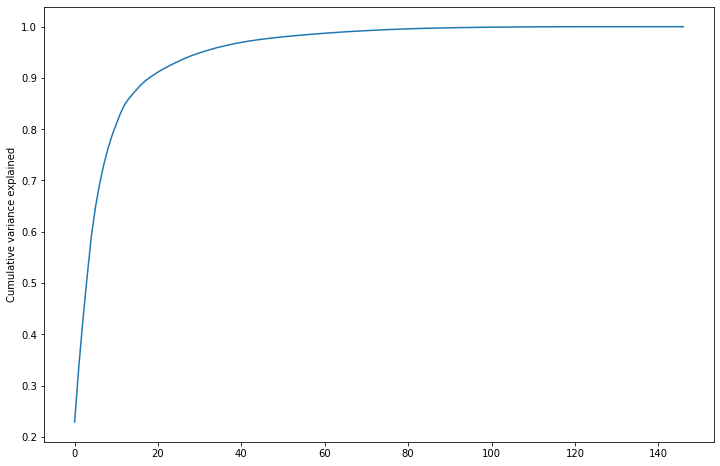

In [169]:
fig = plt.figure(figsize=[12,8])
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [170]:
#Verifying the number of variables with expected variance
pca_again = PCA(0.86)

In [171]:
df_train_pca = pca_again.fit_transform(X_train_res)

In [172]:
df_train_pca.shape

(38618, 15)

Perform PCA with 15 components

In [173]:
from sklearn.decomposition import IncrementalPCA

In [174]:
pca_final =  IncrementalPCA(n_components=15)

In [175]:
df_train_pca = pca_final.fit_transform(X_train_res)

In [176]:
df_train_pca.shape

(38618, 15)

In [177]:
corrmat = np.corrcoef(df_train_pca.transpose())

In [178]:
corrmat.shape

(15, 15)

Plotting the heatmap of the corr matrix

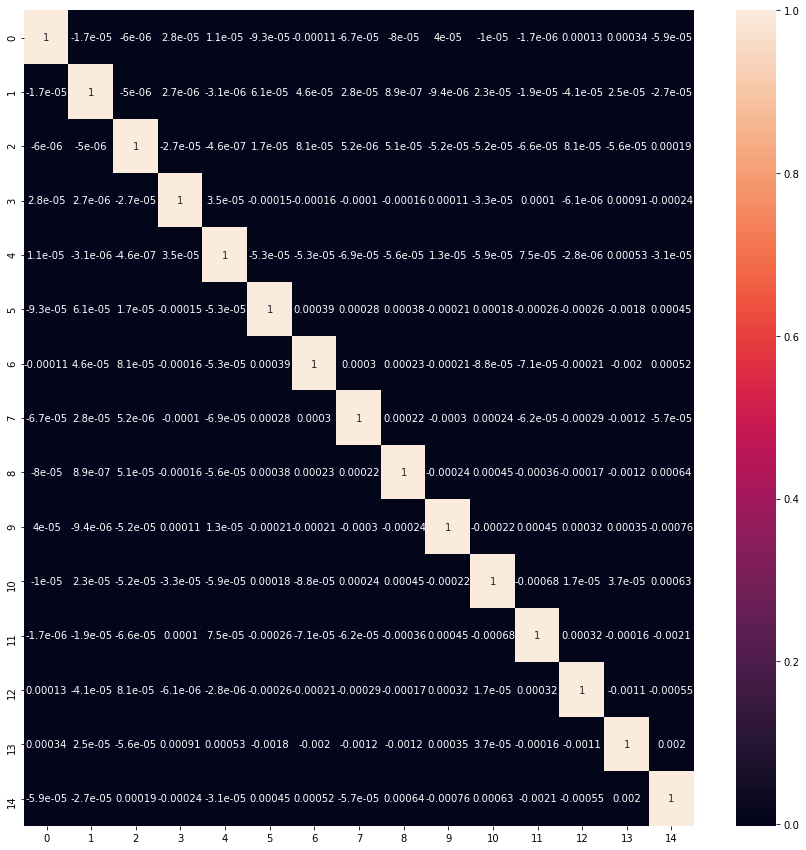

In [179]:
plt.figure(figsize=[15,15])
sns.heatmap(corrmat, annot=True)

*All the identified variables have almost no correlation within them after PCA*

Applying the transformation on the test set

In [180]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(9001, 15)

### Model 1 :  Applying logistic regression on the data on our Principal components

In [181]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [182]:
learner_pca = LogisticRegression()

In [183]:
model_pca = learner_pca.fit(df_train_pca, y_train_res)

Making predictions on the test set

In [184]:
# Confusion matrix 
y_train_res_pred = model_pca.predict(df_train_pca)
confusion = metrics.confusion_matrix(y_train_res, y_train_res_pred)
print(confusion)
print("Accuracy on train set = " + str(round(metrics.accuracy_score(y_train_res, y_train_res_pred),2)))
print("Recall on train Set = " + str(round(metrics.recall_score(y_train_res, y_train_res_pred),2)))


# Confusion matrix 
y_test_pred = model_pca.predict(df_test_pca)
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)
print("Accuracy on test set = " + str(round(metrics.accuracy_score(y_test, y_test_pred),2)))
print("Recall on test set = " + str(round(metrics.recall_score(y_test, y_test_pred),2)))

[[13999  5310]
 [ 4190 15119]]
Accuracy on train set = 0.75
Recall on train Set = 0.78
[[6057 2194]
 [ 187  563]]
Accuracy on test set = 0.74
Recall on test set = 0.75


### Model 2 :  Applying Decision Tree Algorithm on the data on our Principal components

In [185]:
#Importing Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

In [186]:
dt_base =DecisionTreeClassifier(random_state=42,max_depth=4)

In [187]:
dt_base.fit(df_train_pca,y_train_res)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [188]:
y_train_pred = dt_base.predict(df_train_pca)
y_test_pred=   dt_base.predict(df_test_pca)

In [189]:
#Importing library to evaluate
from sklearn.metrics import classification_report

In [190]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.59      0.73      8251
         1.0       0.15      0.77      0.25       750

    accuracy                           0.60      9001
   macro avg       0.56      0.68      0.49      9001
weighted avg       0.90      0.60      0.69      9001



#### Plot the ROC curve

In [191]:
from sklearn.metrics import plot_roc_curve

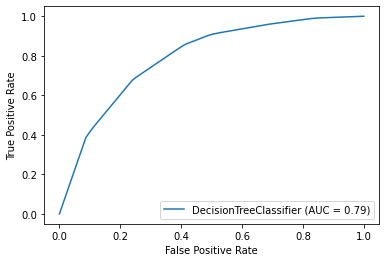

In [192]:
plot_roc_curve(dt_base, df_train_pca, y_train_res, drop_intermediate=False)
plt.show()

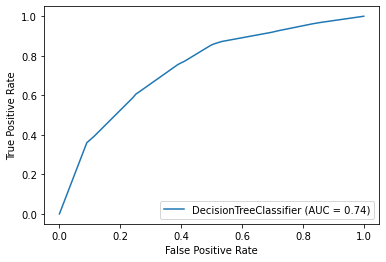

In [193]:
plot_roc_curve(dt_base, df_test_pca, y_test, drop_intermediate=False)
plt.show()

In [194]:
# Confusion matrix on train dataset
confusion = metrics.confusion_matrix(y_train_res, y_train_pred)
print(confusion)
print("Accuracy on train set = " + str(round(metrics.accuracy_score(y_train_res, y_train_pred),2)))
print("Recall on train Set = " + str(round(metrics.recall_score(y_train_res, y_train_pred),2)))


# Confusion matrix on test dataset
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)
print("Accuracy on test set = " + str(round(metrics.accuracy_score(y_test, y_test_pred),2)))
print("Recall on test set = " + str(round(metrics.recall_score(y_test, y_test_pred),2)))

[[11474  7835]
 [ 2880 16429]]
Accuracy on train set = 0.72
Recall on train Set = 0.85
[[4851 3400]
 [ 170  580]]
Accuracy on test set = 0.6
Recall on test set = 0.77


### Hyper-parameter tuning for the Decision Tree

In [359]:
#Importing libraries
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [360]:
dt=DecisionTreeClassifier(random_state=42)

In [361]:
params ={
    "max_depth": [2,3,4],
    "min_samples_leaf": [20,50,100,500]
}

*Since we want to identify churners more than the non churners and hence we will focus on higher recall scre so as to identify more number of True Positives*

In [362]:
grid_search = GridSearchCV(estimator=dt,
                         param_grid =params,
                         cv =4,
                         n_jobs=-1,verbose =1, scoring="recall")

In [363]:
grid_search.fit(df_train_pca,y_train_res)

Fitting 4 folds for each of 12 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    7.1s finished


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4],
                         'min_samples_leaf': [20, 50, 100, 500]},
             scoring='recall', verbose=1)

In [364]:
grid_search.best_score_

0.8151641450354598

In [365]:
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(max_depth=4, min_samples_leaf=20, random_state=42)

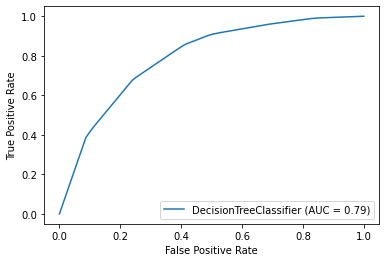

In [366]:
plot_roc_curve(dt_best,df_train_pca,y_train_res)
plt.show()

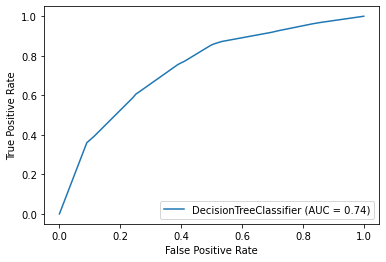

In [367]:
plot_roc_curve(dt_best, df_test_pca, y_test, drop_intermediate=False)
plt.show()

In [368]:
#Making Predictions
y_train_pred = dt_best.predict(df_train_pca)
y_test_pred=   dt_best.predict(df_test_pca)

In [369]:
# Confusion matrix on train dataset
confusion = metrics.confusion_matrix(y_train_res, y_train_pred)
print(confusion)
print("Accuracy on train set = " + str(round(metrics.accuracy_score(y_train_res, y_train_pred),2)))
print("Recall on train Set = " + str(round(metrics.recall_score(y_train_res, y_train_pred),2)))


# Confusion matrix on test dataset
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)
print("Accuracy on test set = " + str(round(metrics.accuracy_score(y_test, y_test_pred),2)))
print("Recall on test set = " + str(round(metrics.recall_score(y_test, y_test_pred),2)))

[[11474  7835]
 [ 2880 16429]]
Accuracy on train set = 0.72
Recall on train Set = 0.85
[[4851 3400]
 [ 170  580]]
Accuracy on test set = 0.6
Recall on test set = 0.77


### Model 3 :  Applying Random Forest Algorithm on the data on our Principal components

In [206]:
#importing libraries
from sklearn.ensemble import RandomForestClassifier

In [207]:
rf = RandomForestClassifier(n_estimators=10, max_depth=10, max_features=5,random_state=100 ,oob_score=True)

In [208]:
%%time
rf.fit(df_train_pca,y_train_res)

Wall time: 2.01 s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:544: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /


RandomForestClassifier(max_depth=10, max_features=5, n_estimators=10,
                       oob_score=True, random_state=100)

In [209]:
rf.oob_score_

0.8385985809726034

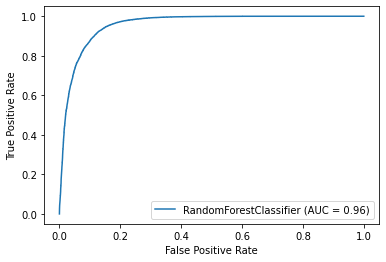

In [210]:
plot_roc_curve(rf, df_train_pca, y_train_res)
plt.show()

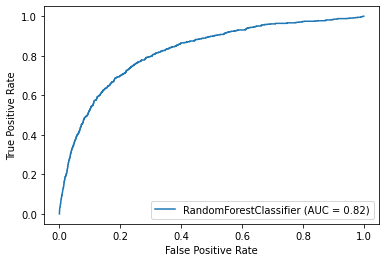

In [211]:
plot_roc_curve(rf, df_test_pca, y_test, drop_intermediate=False)
plt.show()

In [212]:
#Making Predictions
y_train_pred = rf.predict(df_train_pca)
y_test_pred=   rf.predict(df_test_pca)

In [213]:
# Confusion matrix on train dataset
confusion = metrics.confusion_matrix(y_train_res, y_train_pred)
print(confusion)
print("Accuracy on train set = " + str(round(metrics.accuracy_score(y_train_res, y_train_pred),2)))
print("Recall on train Set = " + str(round(metrics.recall_score(y_train_res, y_train_pred),2)))


# Confusion matrix on test dataset
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)
print("Accuracy on test set = " + str(round(metrics.accuracy_score(y_test, y_test_pred),2)))
print("Recall on test set = " + str(round(metrics.recall_score(y_test, y_test_pred),2)))

[[16592  2717]
 [ 1274 18035]]
Accuracy on train set = 0.9
Recall on train Set = 0.93
[[6879 1372]
 [ 260  490]]
Accuracy on test set = 0.82
Recall on test set = 0.65


### Hyper-parameter tuning for the Random Forest

In [214]:
rf =RandomForestClassifier(random_state=100,n_jobs=-1)

In [215]:
#To avoid over training of the model
params ={
    'max_depth': [2,3,4],
    'min_samples_leaf': [2,3,5,8,10],
    'n_estimators': [10, 25, 50, 100]
}

In [216]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1,verbose=1, scoring='recall'
)

In [217]:
%%time
grid_search.fit(df_train_pca,y_train_res)

Fitting 4 folds for each of 80 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   21.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:  5.8min finished


Wall time: 5min 53s


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(n_jobs=-1, random_state=100),
             n_jobs=-1,
             param_grid={'max_depth': [2, 5, 8, 10],
                         'min_samples_leaf': [2, 3, 5, 8, 10],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='recall', verbose=1)

In [218]:
grid_search.best_score_

0.8947637233361293

In [219]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_jobs=-1,
                       random_state=100)

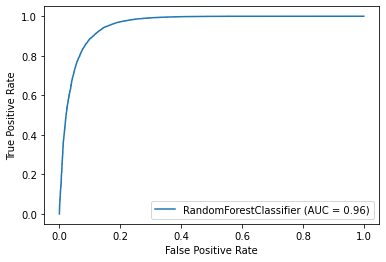

In [220]:
plot_roc_curve(rf_best, df_train_pca, y_train_res)
plt.show()

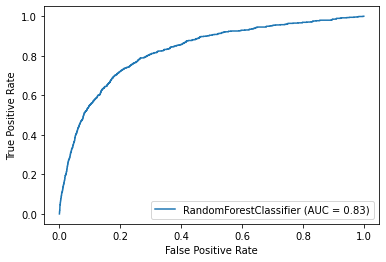

In [221]:
plot_roc_curve(rf_best, df_test_pca, y_test, drop_intermediate=False)
plt.show()

In [222]:
#Making Predictions
y_train_pred = rf_best.predict(df_train_pca)
y_test_pred=   rf_best.predict(df_test_pca)

In [223]:
# Confusion matrix on train dataset
confusion = metrics.confusion_matrix(y_train_res, y_train_pred)
print(confusion)
print("Accuracy on train set = " + str(round(metrics.accuracy_score(y_train_res, y_train_pred),2)))
print("Recall on train Set = " + str(round(metrics.recall_score(y_train_res, y_train_pred),2)))


# Confusion matrix on test dataset
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)
print("Accuracy on test set = " + str(round(metrics.accuracy_score(y_test, y_test_pred),2)))
print("Recall on test set = " + str(round(metrics.recall_score(y_test, y_test_pred),2)))

[[16640  2669]
 [ 1283 18026]]
Accuracy on train set = 0.9
Recall on train Set = 0.93
[[6921 1330]
 [ 255  495]]
Accuracy on test set = 0.82
Recall on test set = 0.66


### Model 4 :  Applying XG Boosting on the data on our Principal components

In [224]:
#Importing libraries
import xgboost as xgb

In [225]:
xg =xgb.XGBClassifier()
xg.fit(df_train_pca, y_train_res)

C:\Users\hp\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:54:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [226]:
print('AUC on train data by XGBoost =', metrics.roc_auc_score(y_true=y_train_res,
                                                              y_score=xg.predict_proba(df_train_pca)[:, 1]))

AUC on train data by XGBoost = 0.9892170846417665


In [227]:
print('AUC on test data by XGBoost =', metrics.roc_auc_score(y_true=y_test,
                                                             y_score=xg.predict_proba(df_test_pca)[:, 1]))

AUC on test data by XGBoost = 0.8227267805922516


In [228]:
#Making Predictions
y_train_pred = xg.predict(df_train_pca)
y_test_pred=   xg.predict(df_test_pca)

In [229]:
# Confusion matrix on train dataset
confusion = metrics.confusion_matrix(y_train_res, y_train_pred)
print(confusion)
print("Accuracy on train set = " + str(round(metrics.accuracy_score(y_train_res, y_train_pred),2)))
print("Recall on train Set = " + str(round(metrics.recall_score(y_train_res, y_train_pred),2)))


# Confusion matrix on test dataset
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)
print("Accuracy on test set = " + str(round(metrics.accuracy_score(y_test, y_test_pred),2)))
print("Recall on test set = " + str(round(metrics.recall_score(y_test, y_test_pred),2)))

[[17935  1374]
 [  467 18842]]
Accuracy on train set = 0.95
Recall on train Set = 0.98
[[7158 1093]
 [ 287  463]]
Accuracy on test set = 0.85
Recall on test set = 0.62


*The above score was based on default parameters. Now we will tune the hyperparameters to find the best parameters for XG Boost*

### Hyper-parameter tuning for XGBoost

In [316]:
# Run for best hyperparameters
xg =xgb.XGBClassifier()

parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4],
              'max_depth': [2,3,4],
              'min_child_weight': [20,25,30],
              'n_estimators': [5,10,15,20]
             }

xg = RandomizedSearchCV(estimator=xg,
                param_distributions=parameters,
                n_jobs=-1,
                cv=3,
                n_iter=100,
                scoring='recall',
                refit=True,
                      verbose=1)

xg.fit(df_train_pca, y_train_res)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.1min finished
C:\Users\hp\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:59:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...,
                                           num_parallel_tree=None,
                                           random_state=None, reg_alpha=None,
                                   

In [317]:
print(xg.best_params_)
print(xg.best_score_)
print(xg.best_estimator_)

{'n_estimators': 20, 'min_child_weight': 25, 'max_depth': 4, 'learning_rate': 0.3}
0.845460281656452
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=4,
              min_child_weight=25, missing=nan, monotone_constraints='()',
              n_estimators=20, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [318]:
y_train_res

array([0., 0., 0., ..., 1., 1., 1.])

In [323]:
#Final model on the best parameters    
xg_final = xgb.XGBClassifier(learning_rate=0.3,
                                max_depth=4,
                                min_child_weight=25,
                                n_estimators=20,
                            subsample =0.5)
    
xg_final.fit(df_train_pca, y_train_res)
print('AUC on train data by XGBoost =', metrics.roc_auc_score(y_true=y_train_res, y_score=xg_final.predict_proba(df_train_pca)[:, 1]))

print('AUC on test data by XGBoost =', metrics.roc_auc_score(y_true=y_test, y_score=xg_final.predict_proba(df_test_pca)[:, 1]))

C:\Users\hp\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:01:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
AUC on train data by XGBoost = 0.9039897922709118
AUC on test data by XGBoost = 0.8364790530440755


In [324]:
print('AUC on train data by XGBoost =', metrics.roc_auc_score(y_true=y_train_res, y_score=xg_final.predict_proba(df_train_pca)[:, 1]))

print('AUC on test data by XGBoost =', metrics.roc_auc_score(y_true=y_test, y_score=xg_final.predict_proba(df_test_pca)[:, 1]))

AUC on train data by XGBoost = 0.9039897922709118
AUC on test data by XGBoost = 0.8364790530440755


In [325]:
#Making Predictions
y_train_pred = xg_final.predict(df_train_pca)
y_test_pred=   xg_final.predict(df_test_pca)

In [326]:
# Confusion matrix on train dataset
confusion = metrics.confusion_matrix(y_train_res, y_train_pred)
print(confusion)
print("Accuracy on train set = " + str(round(metrics.accuracy_score(y_train_res, y_train_pred),2)))
print("Recall on train Set = " + str(round(metrics.recall_score(y_train_res, y_train_pred),2)))


# Confusion matrix on test dataset
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)
print("Accuracy on test set = " + str(round(metrics.accuracy_score(y_test, y_test_pred),2)))
print("Recall on test set = " + str(round(metrics.recall_score(y_test, y_test_pred),2)))

[[15488  3821]
 [ 2836 16473]]
Accuracy on train set = 0.83
Recall on train Set = 0.85
[[6583 1668]
 [ 197  553]]
Accuracy on test set = 0.79
Recall on test set = 0.74


### Building Models to Predict Feature Importances now

### Model 5 :  Ensemble - Applying Logistic Regression and Random Forest Algorithm to find feature importances along with handling MultiCollinearity


In [332]:
print(X_train_res.shape)
print(y_train_res.shape)
print(X_test.shape)
print(y_test.shape)

(38618, 147)
(38618,)
(9001, 147)
(9001,)


In [333]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.feature_selection import RFE

import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor


**RFE and Logistic**

In [334]:
logreg = LogisticRegression(max_iter=1000)
rfe = RFE(logreg, 25)             # running RFE with 25 variables as output
rfe = rfe.fit(X_train_res, y_train_res)

# Confusion matrix 
y_train_res_pred = rfe.predict(X_train_res)
confusion = metrics.confusion_matrix(y_train_res, y_train_res_pred)
# print(confusion)
print("Accuracy on train set = " + str(round(metrics.accuracy_score(y_train_res, y_train_res_pred),2)))
print("Recall on train Set = " + str(round(metrics.recall_score(y_train_res, y_train_res_pred),2)))


# Confusion matrix 
y_test_pred = rfe.predict(X_test)
confusion = metrics.confusion_matrix(y_test, y_test_pred)
# print(confusion)
print("Accuracy on test set = " + str(round(metrics.accuracy_score(y_test, y_test_pred),2)))
print("Recall on test set = " + str(round(metrics.recall_score(y_test, y_test_pred),2)))

## Checking VIF
col = X_train.columns[rfe.support_]
col_25_RFE = X_train.columns[rfe.support_]
vif = pd.DataFrame()
X_train_VIF = X_train_res[col]
vif['Features'] = X_train_VIF.columns
vif['VIF'] = [variance_inflation_factor(X_train_VIF.values, i) for i in range(X_train_VIF.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

## Building logistic regression model
log_reg = sm.Logit(y_train_res, X_train_VIF).fit()
# printing the summary table 
print(log_reg.summary()) 

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=25 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Accuracy on train set = 0.83
Recall on train Set = 0.86
Accuracy on test set = 0.82
Recall on test set = 0.82
              Features     VIF
7       total_og_mou_8  333.34
6         std_og_mou_8  199.24
4         loc_og_mou_8   71.72
1               arpu_8   13.14
10        loc_ic_mou_8   13.11
12      total_ic_mou_8   11.37
0               arpu_6   10.26
17   total_rech_data_8    9.53
22         sachet_2g_8    8.44
15    total_rech_amt_6    5.79
3     loc_og_t2m_mou_8    3.98
9         loc_ic_mou_7    3.96
14    total_rech_num_8    3.49
5         std_og_mou_7    3.23
18     max_rech_data_8    2.71
20           arpu_2g_6    1.98
11        std_ic_mou_6    1.71
16  last_day_rch_amt_8    1.69
23          aug_vbc_3g    1.63
21        monthly_2g_8    1.53
19         vol_2g_mb_8    1.39
8     loc_ic_t2f_mou_8    1.29
2        roam_og_mou_7    1.27
24          sep_vbc_3g    1.07
13        spl_ic_mou_8    1.05
Optimization terminated successfully.
         Current function value: 0.375894
    

**Random Forest**

In [346]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

params ={
    'max_depth': [2,3,4],
    'min_samples_leaf': [2,3,5,8,10],
    'n_estimators': [10, 25, 50, 100]
}

grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="recall")

In [347]:
%%time
grid_search.fit(X_train_VIF, y_train_res)

print(grid_search.best_score_)

rf_best = grid_search.best_estimator_
print(rf_best)

Fitting 4 folds for each of 60 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  1.6min finished


0.7952245455820263
RandomForestClassifier(max_depth=4, min_samples_leaf=2, n_estimators=25,
                       n_jobs=-1, random_state=42)
Wall time: 1min 36s


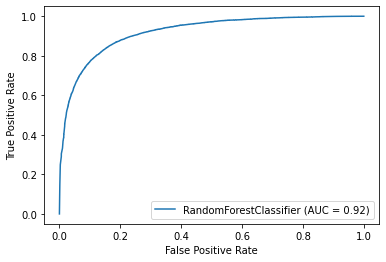

In [348]:
plot_roc_curve(rf_best, X_train_VIF, y_train_res)
plt.show()

In [349]:
rf_best.feature_importances_

array([0.00103871, 0.11565008, 0.02304807, 0.12664979, 0.06557475,
       0.21350126, 0.00408975, 0.05940223, 0.00125161, 0.18406521,
       0.07327071, 0.08137878, 0.03919446, 0.00387229, 0.00801228])

In [350]:
imp_df = pd.DataFrame({
    "Varname": X_train_VIF.columns,
    "Imp": rf_best.feature_importances_
})

imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
5,total_ic_mou_8,0.213501
9,last_day_rch_amt_8,0.184065
3,total_og_mou_8,0.126650
1,loc_og_t2m_mou_8,0.115650
11,max_rech_data_8,0.081379
10,total_rech_data_8,0.073271
4,loc_ic_t2f_mou_8,0.065575
7,total_rech_num_8,0.059402
12,vol_2g_mb_8,0.039194
2,std_og_mou_7,0.023048


In [351]:
## We get the feature importance above using Random forest.
## Let us get feature importance using RFE and VIF and then compare and build a business strategy on top of it.

## Above RFE with 25 variables show many variables with interdependence - high VIF score.
## Let us build a RFE with 15 variables and chek VIF score

In [352]:
logreg = LogisticRegression(max_iter=1000)
rfe = RFE(logreg, 15)             # running RFE with 25 variables as output
rfe = rfe.fit(X_train_res, y_train_res)

# Confusion matrix 
y_train_res_pred = rfe.predict(X_train_res)
confusion = metrics.confusion_matrix(y_train_res, y_train_res_pred)
# print(confusion)
print("Accuracy on train set = " + str(round(metrics.accuracy_score(y_train_res, y_train_res_pred),2)))
print("Recall on train Set = " + str(round(metrics.recall_score(y_train_res, y_train_res_pred),2)))


# Confusion matrix 
y_test_pred = rfe.predict(X_test)
confusion = metrics.confusion_matrix(y_test, y_test_pred)
# print(confusion)
print("Accuracy on test set = " + str(round(metrics.accuracy_score(y_test, y_test_pred),2)))
print("Recall on test set = " + str(round(metrics.recall_score(y_test, y_test_pred),2)))

## Checking VIF
col = X_train.columns[rfe.support_]
col_15_RFE = X_train.columns[rfe.support_]
vif = pd.DataFrame()
X_train_VIF = X_train_res[col]
vif['Features'] = X_train_VIF.columns
vif['VIF'] = [variance_inflation_factor(X_train_VIF.values, i) for i in range(X_train_VIF.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

## Building logistic regression model
log_reg = sm.Logit(y_train_res, X_train_VIF).fit()
# printing the summary table 
print(log_reg.summary()) 

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Accuracy on train set = 0.83
Recall on train Set = 0.85
Accuracy on test set = 0.81
Recall on test set = 0.81
              Features   VIF
0               arpu_6  6.17
8     total_rech_amt_6  4.50
3       total_og_mou_8  3.72
7     total_rech_num_8  3.16
2         std_og_mou_7  2.68
1     loc_og_t2m_mou_8  2.20
5       total_ic_mou_8  2.07
11     max_rech_data_8  1.95
10   total_rech_data_8  1.69
13          aug_vbc_3g  1.58
9   last_day_rch_amt_8  1.48
4     loc_ic_t2f_mou_8  1.26
12         vol_2g_mb_8  1.25
14          sep_vbc_3g  1.06
6         spl_ic_mou_8  1.04
Optimization terminated successfully.
         Current function value: 0.404726
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                38618
Model:                          Logit   Df Residuals:                    38603
Method:                           MLE   Df Model:                           14
Date:   

In [354]:
col

Index(['arpu_6', 'loc_og_t2m_mou_8', 'std_og_mou_7', 'total_og_mou_8',
       'loc_ic_t2f_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8',
       'total_rech_num_8', 'total_rech_amt_6', 'last_day_rch_amt_8',
       'total_rech_data_8', 'max_rech_data_8', 'vol_2g_mb_8', 'aug_vbc_3g',
       'sep_vbc_3g'],
      dtype='object')

In [355]:
# Let us drop this arpu_6 and train the model again

col = [ 'loc_og_t2m_mou_8', 'std_og_mou_7', 'total_og_mou_8',
       'loc_ic_t2f_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8',
       'total_rech_num_8', 'total_rech_amt_6', 'last_day_rch_amt_8',
       'total_rech_data_8', 'max_rech_data_8', 'vol_2g_mb_8', 'aug_vbc_3g',
       'sep_vbc_3g']

vif = pd.DataFrame()
X_train_VIF = X_train_res[col]
vif['Features'] = X_train_VIF.columns
vif['VIF'] = [variance_inflation_factor(X_train_VIF.values, i) for i in range(X_train_VIF.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

## Building logistic regression model
log_reg = sm.Logit(y_train_res, X_train_VIF).fit()
# printing the summary table 
print(log_reg.summary()) 

              Features   VIF
2       total_og_mou_8  3.60
6     total_rech_num_8  2.87
1         std_og_mou_7  2.54
7     total_rech_amt_6  2.18
0     loc_og_t2m_mou_8  2.17
4       total_ic_mou_8  2.05
10     max_rech_data_8  1.88
9    total_rech_data_8  1.68
12          aug_vbc_3g  1.58
8   last_day_rch_amt_8  1.48
3     loc_ic_t2f_mou_8  1.25
11         vol_2g_mb_8  1.24
13          sep_vbc_3g  1.06
5         spl_ic_mou_8  1.04
Optimization terminated successfully.
         Current function value: 0.438495
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                38618
Model:                          Logit   Df Residuals:                    38604
Method:                           MLE   Df Model:                           13
Date:                Mon, 25 Jan 2021   Pseudo R-squ.:                  0.3674
Time:                        17:25:47   Log-Likelihood:             

In [356]:
## We will now look at the plots for follwoing varibales - 

col = ['loc_og_t2m_mou_8', 'std_og_mou_7', 'total_og_mou_8',
       'loc_ic_t2f_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8',
       'total_rech_num_8', 'total_rech_amt_6', 'last_day_rch_amt_8',
       'total_rech_data_8', 'max_rech_data_8', 'vol_2g_mb_8', 'aug_vbc_3g',
       'sep_vbc_3g']

In [371]:
#Training Random Forest model again
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

params ={
    'max_depth': [2,3,4],
    'min_samples_leaf': [2,3,5,8,10],
    'n_estimators': [10, 25, 50, 100]
}

grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="recall")

In [373]:
%%time
grid_search.fit(X_train_VIF, y_train_res)

print(grid_search.best_score_)

rf_best = grid_search.best_estimator_
print(rf_best)

Fitting 4 folds for each of 60 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  1.6min finished


0.7909262920409894
RandomForestClassifier(max_depth=4, min_samples_leaf=10, n_jobs=-1,
                       random_state=42)
Wall time: 1min 40s


In [374]:
rf_best.feature_importances_

array([0.15807754, 0.02314073, 0.08561152, 0.03504311, 0.2184937 ,
       0.00574196, 0.05986529, 0.00059193, 0.1532218 , 0.10904417,
       0.09919315, 0.03502676, 0.0102079 , 0.00674044])

In [375]:
imp_df = pd.DataFrame({
    "Varname": X_train_VIF.columns,
    "Imp": rf_best.feature_importances_
})

imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
4,total_ic_mou_8,0.218494
0,loc_og_t2m_mou_8,0.158078
8,last_day_rch_amt_8,0.153222
9,total_rech_data_8,0.109044
10,max_rech_data_8,0.099193
2,total_og_mou_8,0.085612
6,total_rech_num_8,0.059865
3,loc_ic_t2f_mou_8,0.035043
11,vol_2g_mb_8,0.035027
1,std_og_mou_7,0.023141


In [376]:
# Confusion matrix 
y_train_res_pred = rf_best.predict(X_train_VIF)
confusion = metrics.confusion_matrix(y_train_res, y_train_res_pred)
# print(confusion)
print("Accuracy on train set = " + str(round(metrics.accuracy_score(y_train_res, y_train_res_pred),2)))
print("Recall on train Set = " + str(round(metrics.recall_score(y_train_res, y_train_res_pred),2)))


# Confusion matrix 
y_test_pred = rf_best.predict(X_test[X_train_VIF.columns])
confusion = metrics.confusion_matrix(y_test, y_test_pred)
# print(confusion)
print("Accuracy on test set = " + str(round(metrics.accuracy_score(y_test, y_test_pred),2)))
print("Recall on test set = " + str(round(metrics.recall_score(y_test, y_test_pred),2)))

Accuracy on train set = 0.84
Recall on train Set = 0.79
Accuracy on test set = 0.88
Recall on test set = 0.76


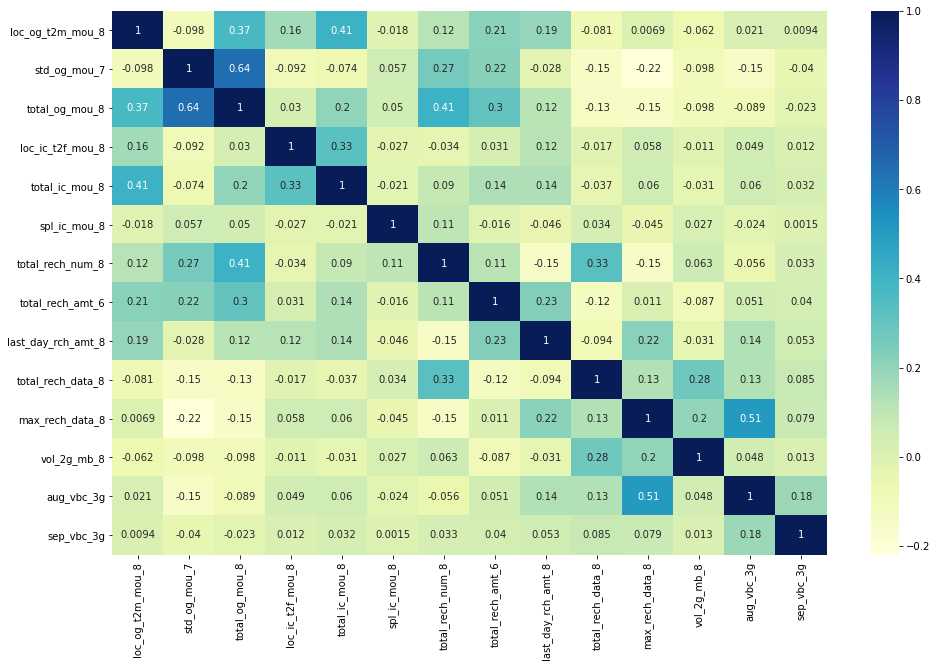

In [357]:
imp_features = col
plt.figure(figsize = (16, 10))
sns.heatmap(df_train[imp_features].corr(), annot = True, cmap="YlGnBu")
plt.show()

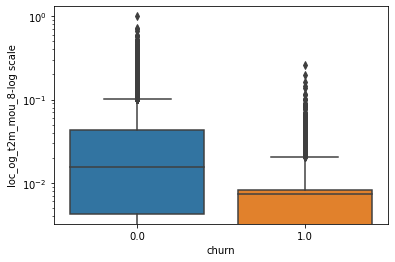

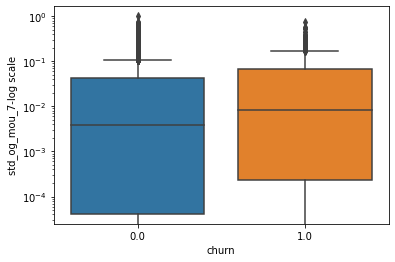

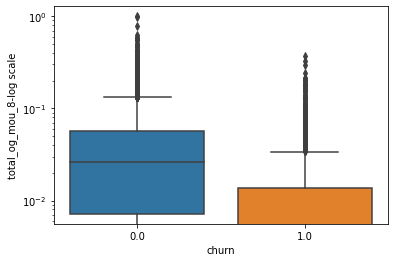

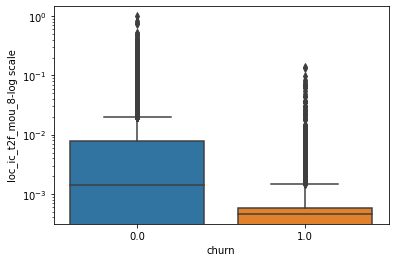

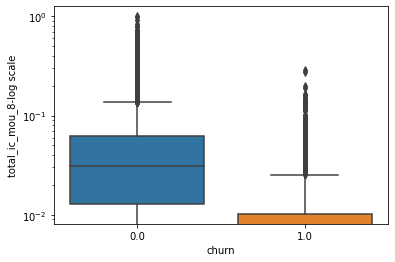

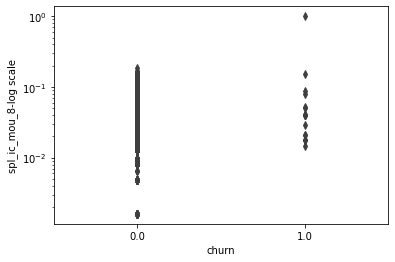

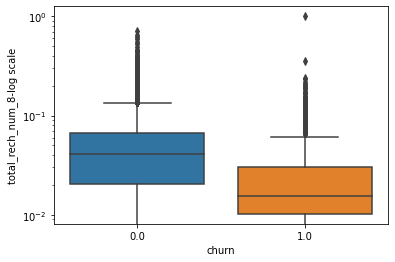

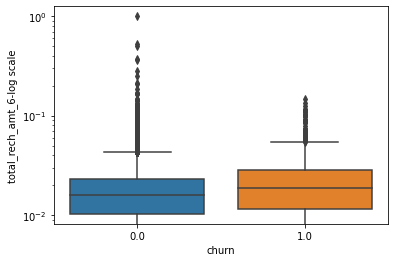

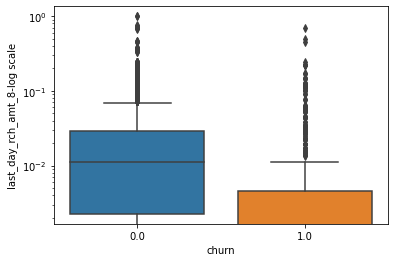

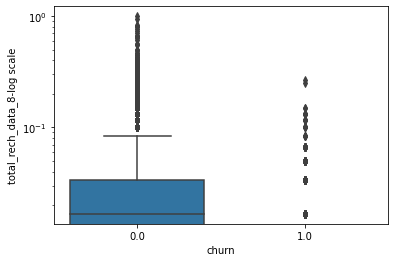

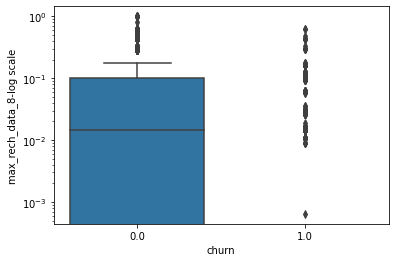

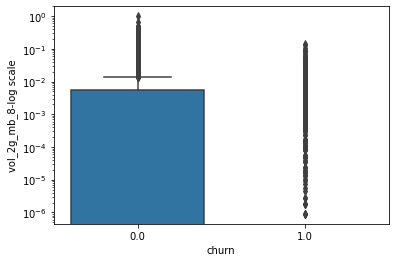

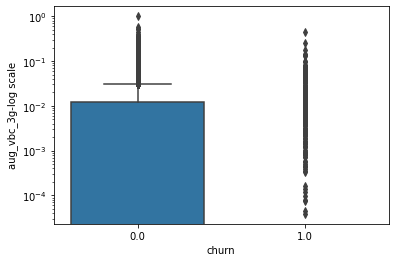

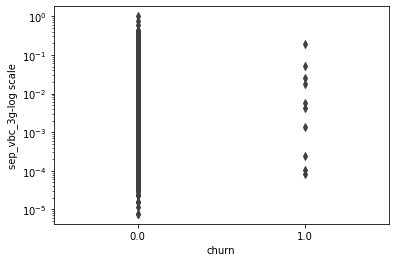

In [358]:
for col in imp_features:
    ax = sns.boxplot(x=y_train , y=X_train[col])
    plt.xlabel("churn")
    plt.ylabel(col+"-log scale")
    ax.set(yscale="log")
    plt.show()

## CONCLUSION

### 1) For Feature Selection

#### From above analysis we can see that following parameters can be used to differentiate between churners and non-churners.

##### 'total_ic_mou_8'
##### 'loc_og_t2m_mou_8'
##### 'last_day_rch_amt_8'
##### 'total_rech_data_8'
##### 'max_rech_data_8'

##### This shows that when customers start receiving less number of incoming calls then they might have switched to a new network and might churn soon
##### As the number of local outgoing calls reduces there are chances of higher churn.
##### The decrease in recharge amount can be a factor to identify potential chruners.
##### The decrease in total recharge data and maximum recharge data can also help in identifying the chruners as data is like a bread butter in current century and if te customer is not sufficiently recharging data then that would mean he has either switched to other network or planning to do so.

##### One reason may be that the users are experiencing bad network quality and having short calls.
##### They might be people who are already using another network for long duration calls.


### 2) Model for Prediction - 


In [327]:
xg_final = xgb.XGBClassifier(learning_rate=0.3,
                                max_depth=4,
                                min_child_weight=25,
                                n_estimators=20,
                            subsample =0.5)

xg_final.fit(df_train_pca, y_train_res)
print('AUC on train data by XGBoost =', metrics.roc_auc_score(y_true=y_train_res, y_score=xg_final.predict_proba(df_train_pca)[:, 1]))

print('AUC on test data by XGBoost =', metrics.roc_auc_score(y_true=y_test, y_score=xg_final.predict_proba(df_test_pca)[:, 1]))

C:\Users\hp\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:02:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
AUC on train data by XGBoost = 0.9039897922709118
AUC on test data by XGBoost = 0.8364790530440755


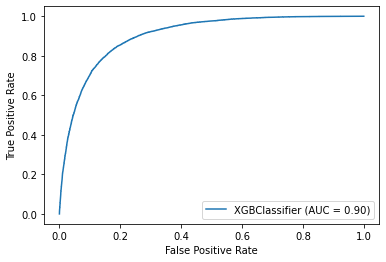

In [328]:
plot_roc_curve(xg_final, df_train_pca, y_train_res)
plt.show()

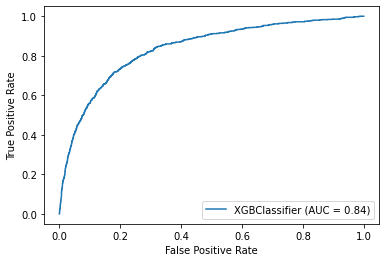

In [329]:
plot_roc_curve(xg_final, df_test_pca, y_test)
plt.show()

In [330]:
#Making Predictions
y_train_pred = xg_final.predict(df_train_pca)
y_test_pred=   xg_final.predict(df_test_pca)

In [331]:
# Confusion matrix on train dataset
confusion = metrics.confusion_matrix(y_train_res, y_train_pred)
print(confusion)
print("Accuracy on train set = " + str(round(metrics.accuracy_score(y_train_res, y_train_pred),2)))
print("Recall on train Set = " + str(round(metrics.recall_score(y_train_res, y_train_pred),2)))


# Confusion matrix on test dataset
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)
print("Accuracy on test set = " + str(round(metrics.accuracy_score(y_test, y_test_pred),2)))
print("Recall on test set = " + str(round(metrics.recall_score(y_test, y_test_pred),2)))

[[15488  3821]
 [ 2836 16473]]
Accuracy on train set = 0.83
Recall on train Set = 0.85
[[6583 1668]
 [ 197  553]]
Accuracy on test set = 0.79
Recall on test set = 0.74


**Since our focus is to maximize the identification of churners more as compared to non churners,
hence Recall is a better choice of metric and also the higher the area under the ROC curve the better.
And therefore even though the Precision is higher in Decision Tree the ROC AUC curve has less area compare to XG Boost and hence considering these two factors we can see that XG Boost is giving the best model for predicton with Regularization as well.**
